# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [3]:
if not os.path.exists('lut.py'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

In [4]:
import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

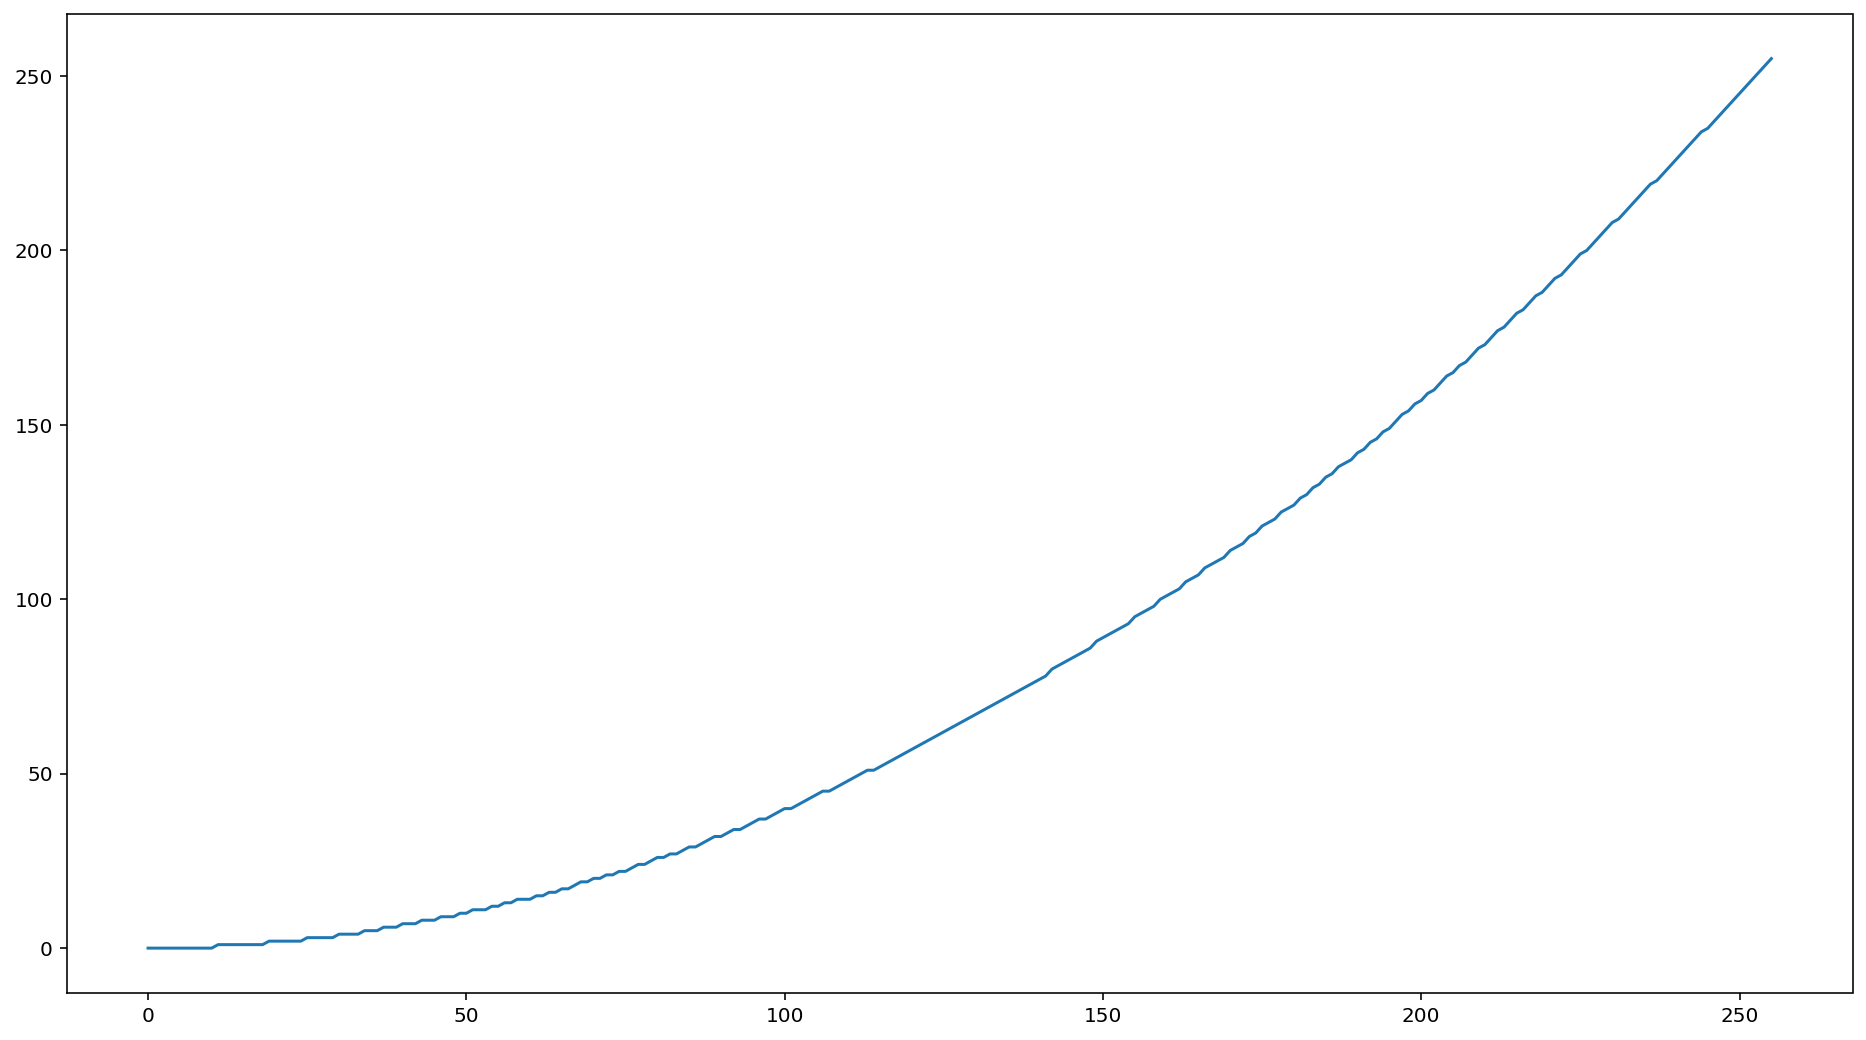

In [5]:
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [6]:
if not os.path.exists('lena.bmp'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if not os.path.exists('jet.bmp'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

In [7]:
img = cv2.imread('jet.bmp')

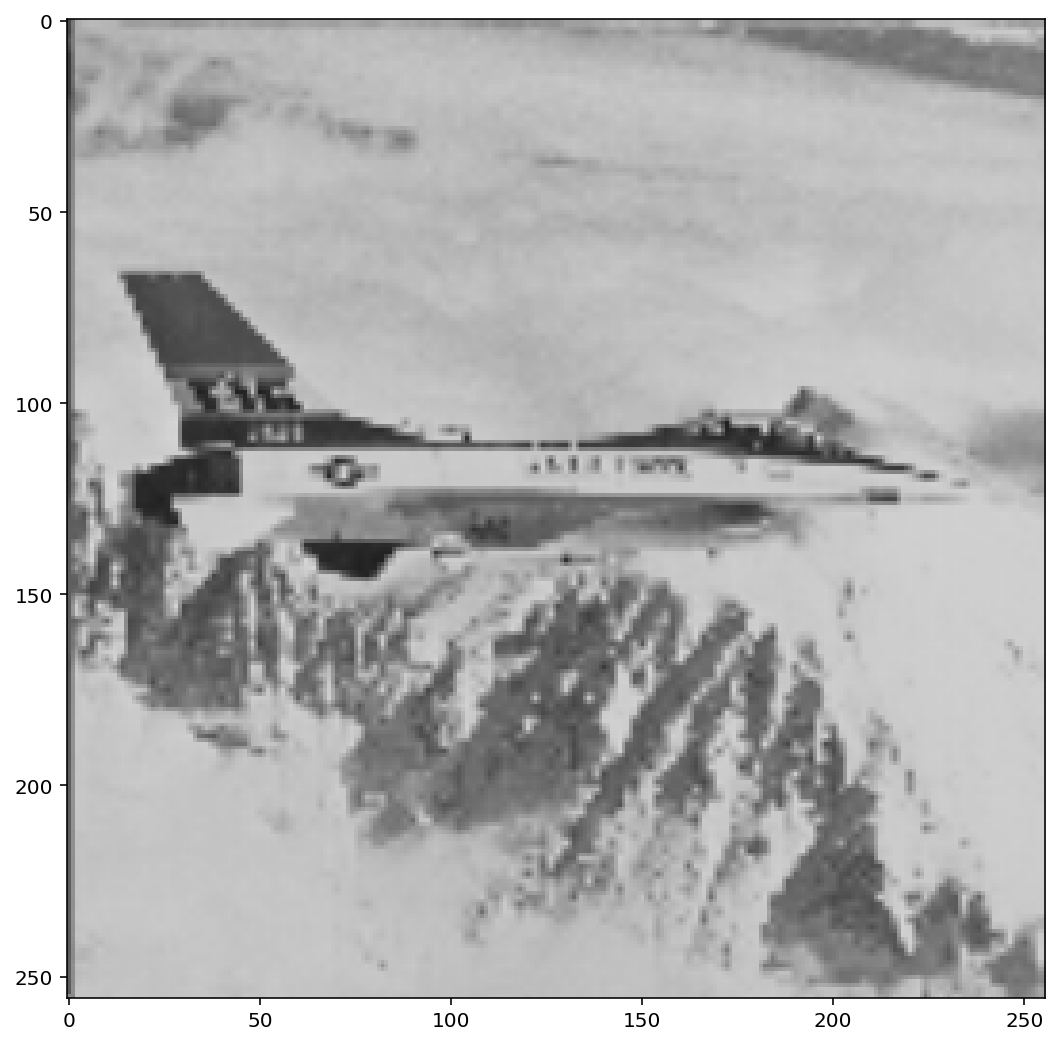

In [8]:
plt.imshow(img)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [9]:
img_lut = cv2.LUT(img, lut.wykladnicza)

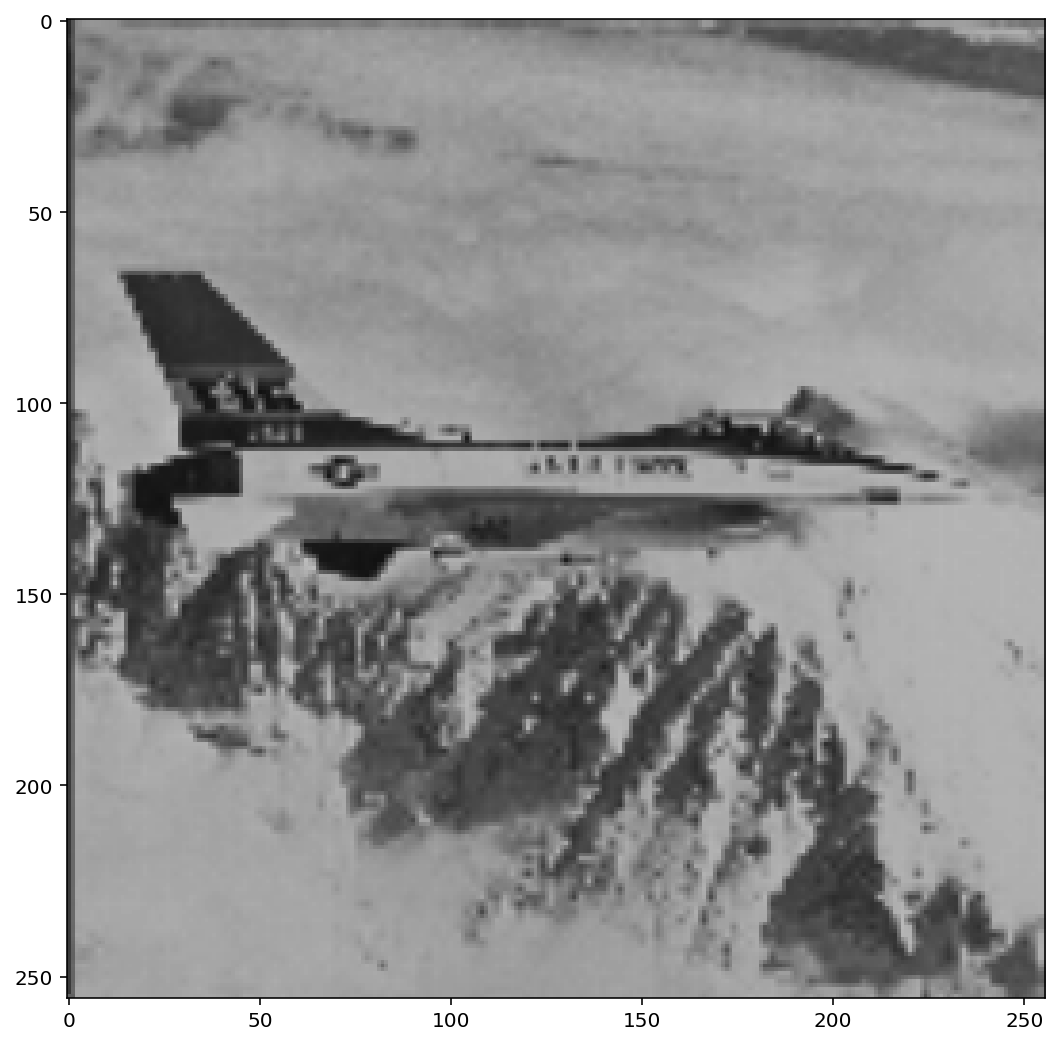

In [10]:
plt.imshow(img_lut)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [11]:
def LUT(src, lut):
    img = lut[src]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))
    
    ax1.plot(lut)
    ax2.imshow(src)
    ax3.imshow(img)
    
    ax1.set_aspect('equal')
    
    ax1.set_title('LUT')
    ax2.set_title('Original image')
    ax3.set_title('Transformed image')
    
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

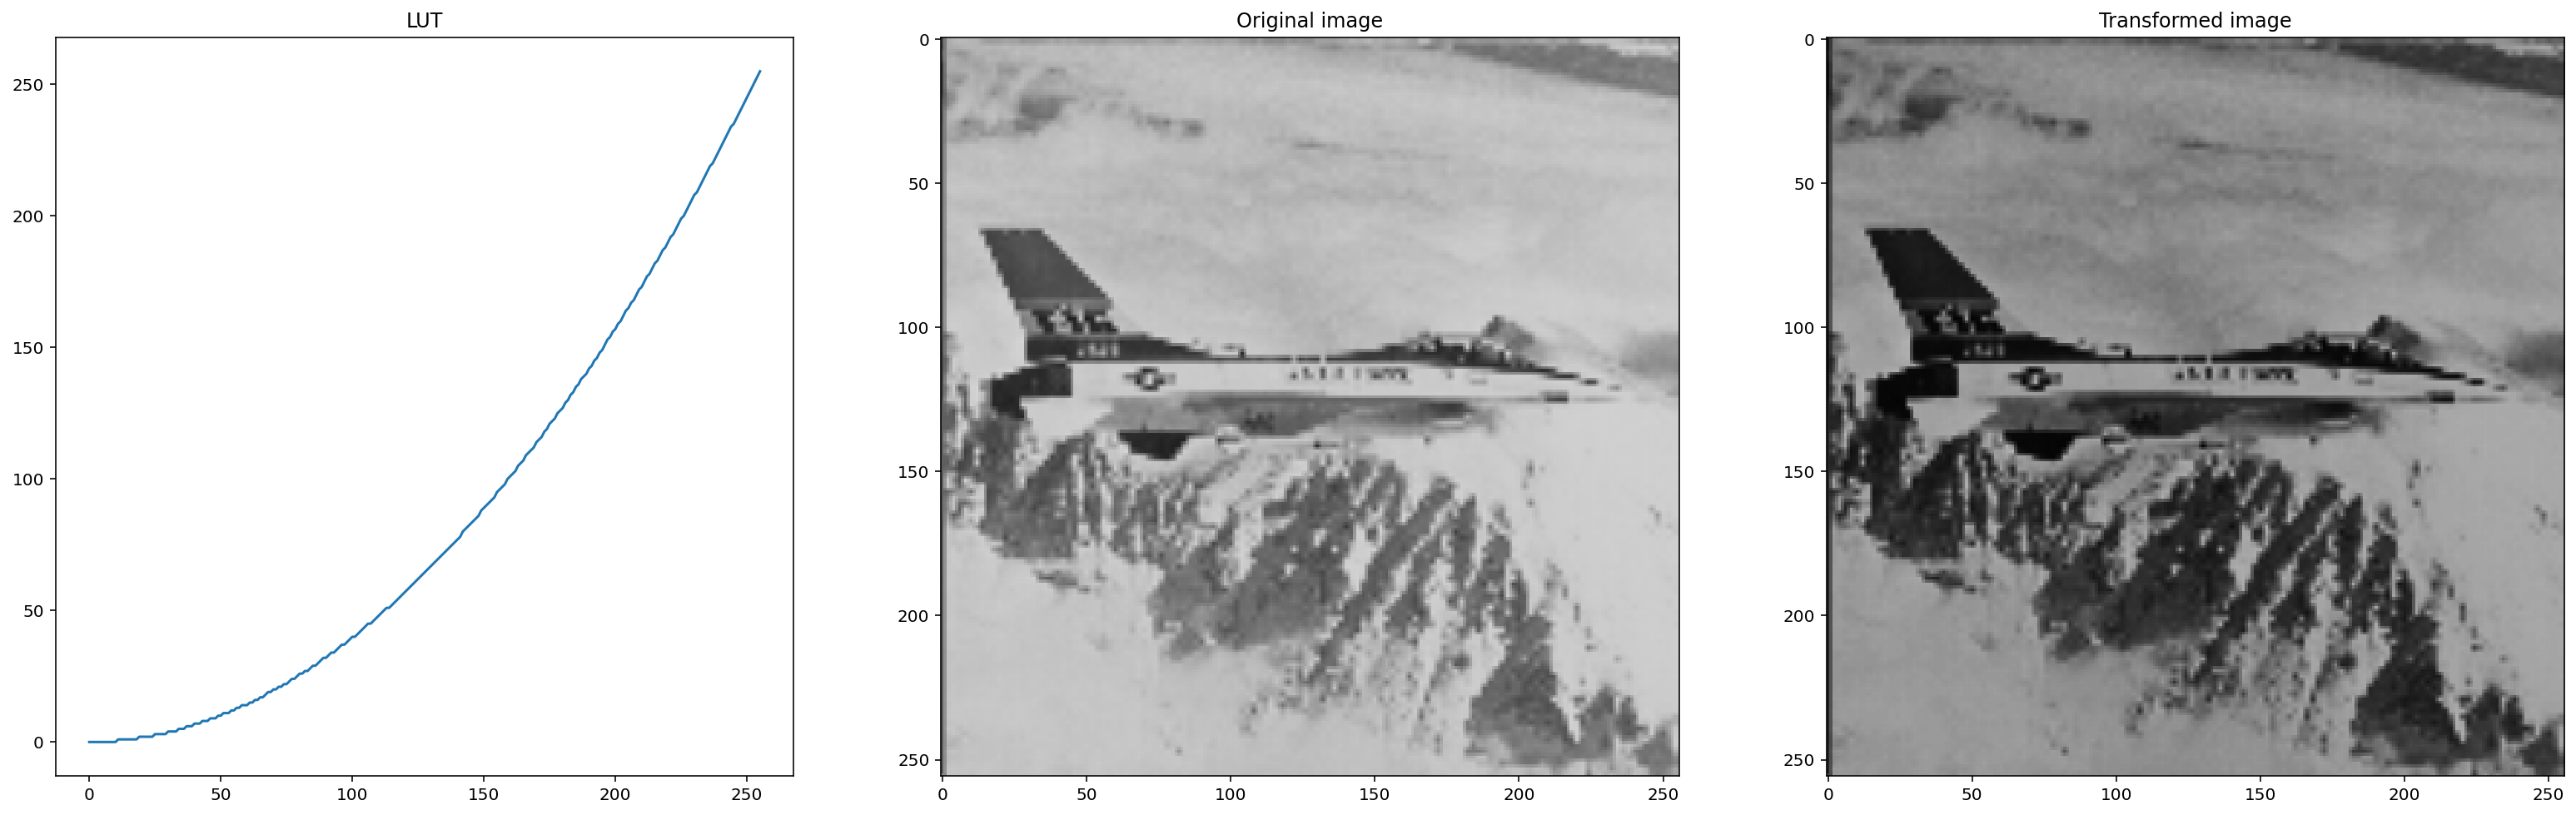

In [12]:
LUT(img, lut.kwadratowa)

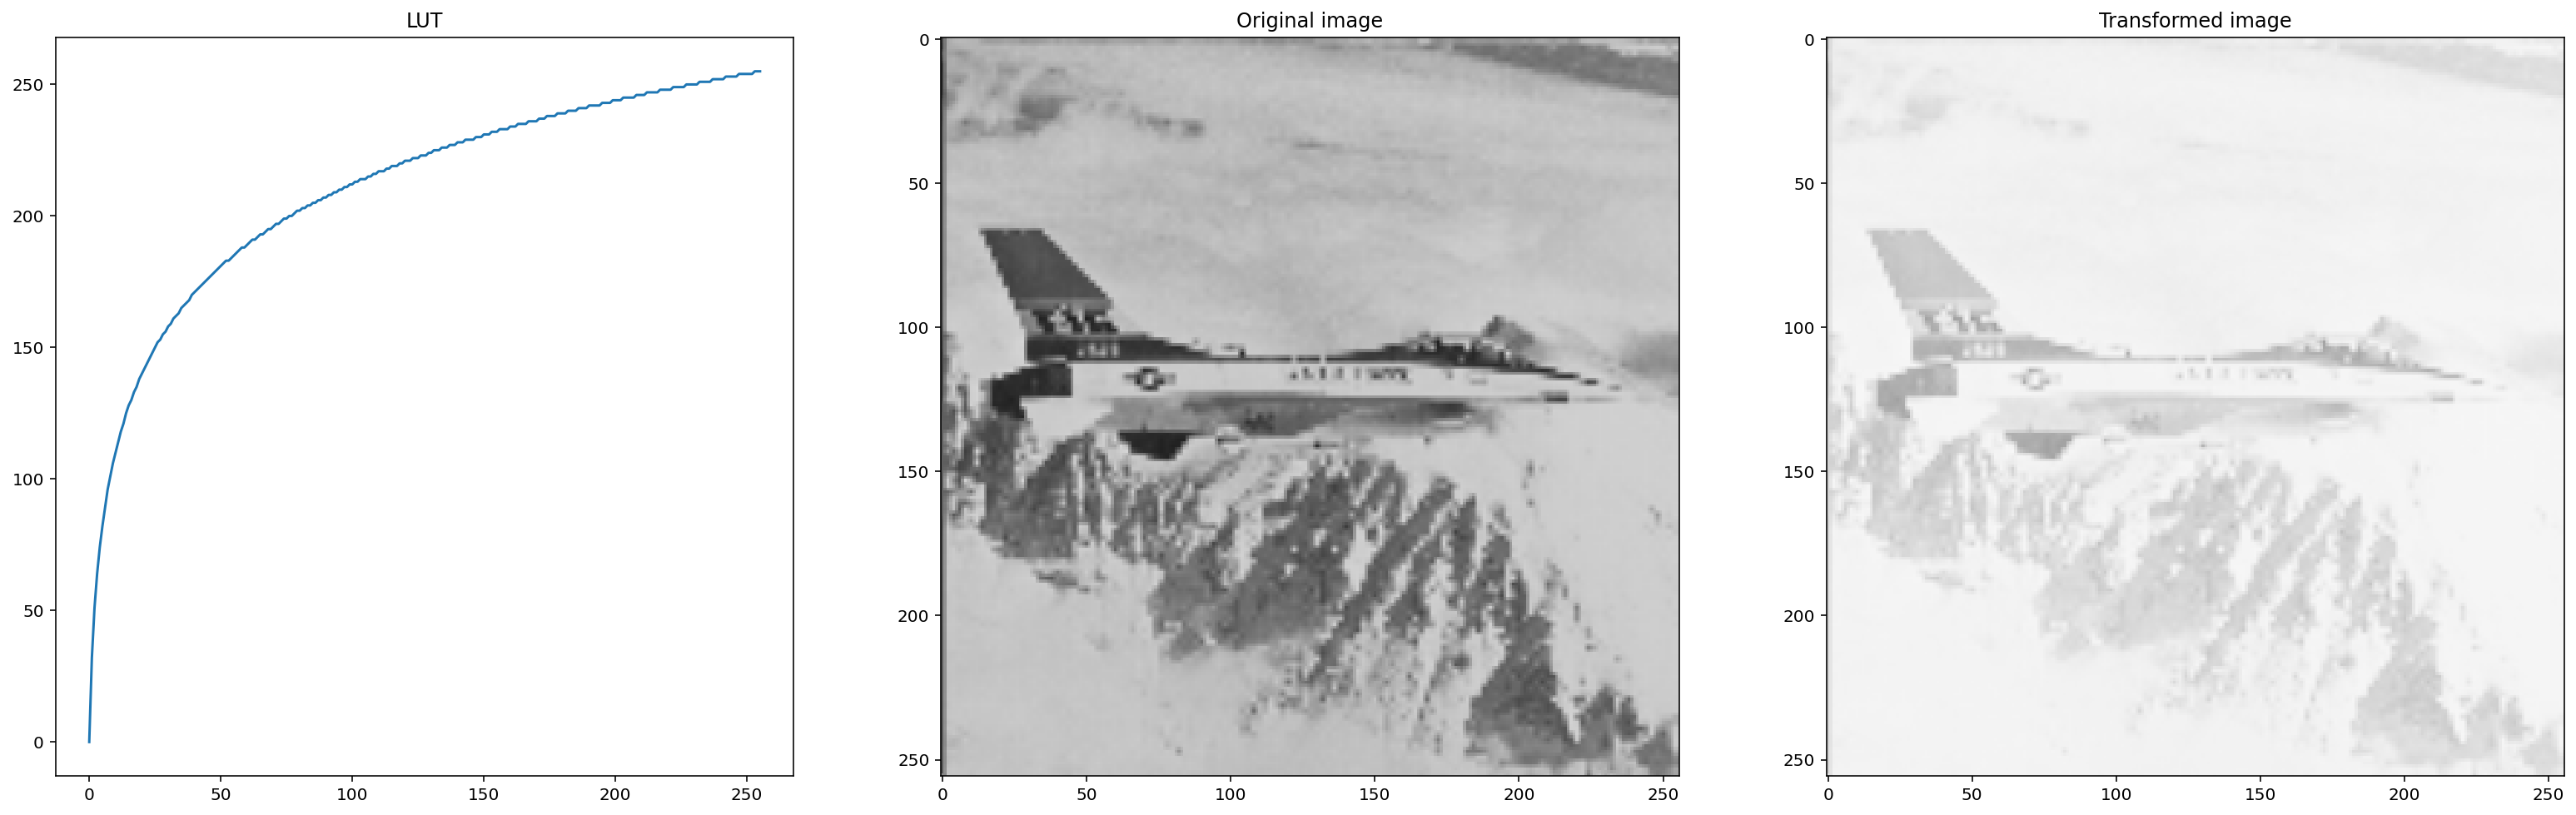

In [13]:
LUT(img, lut.log)

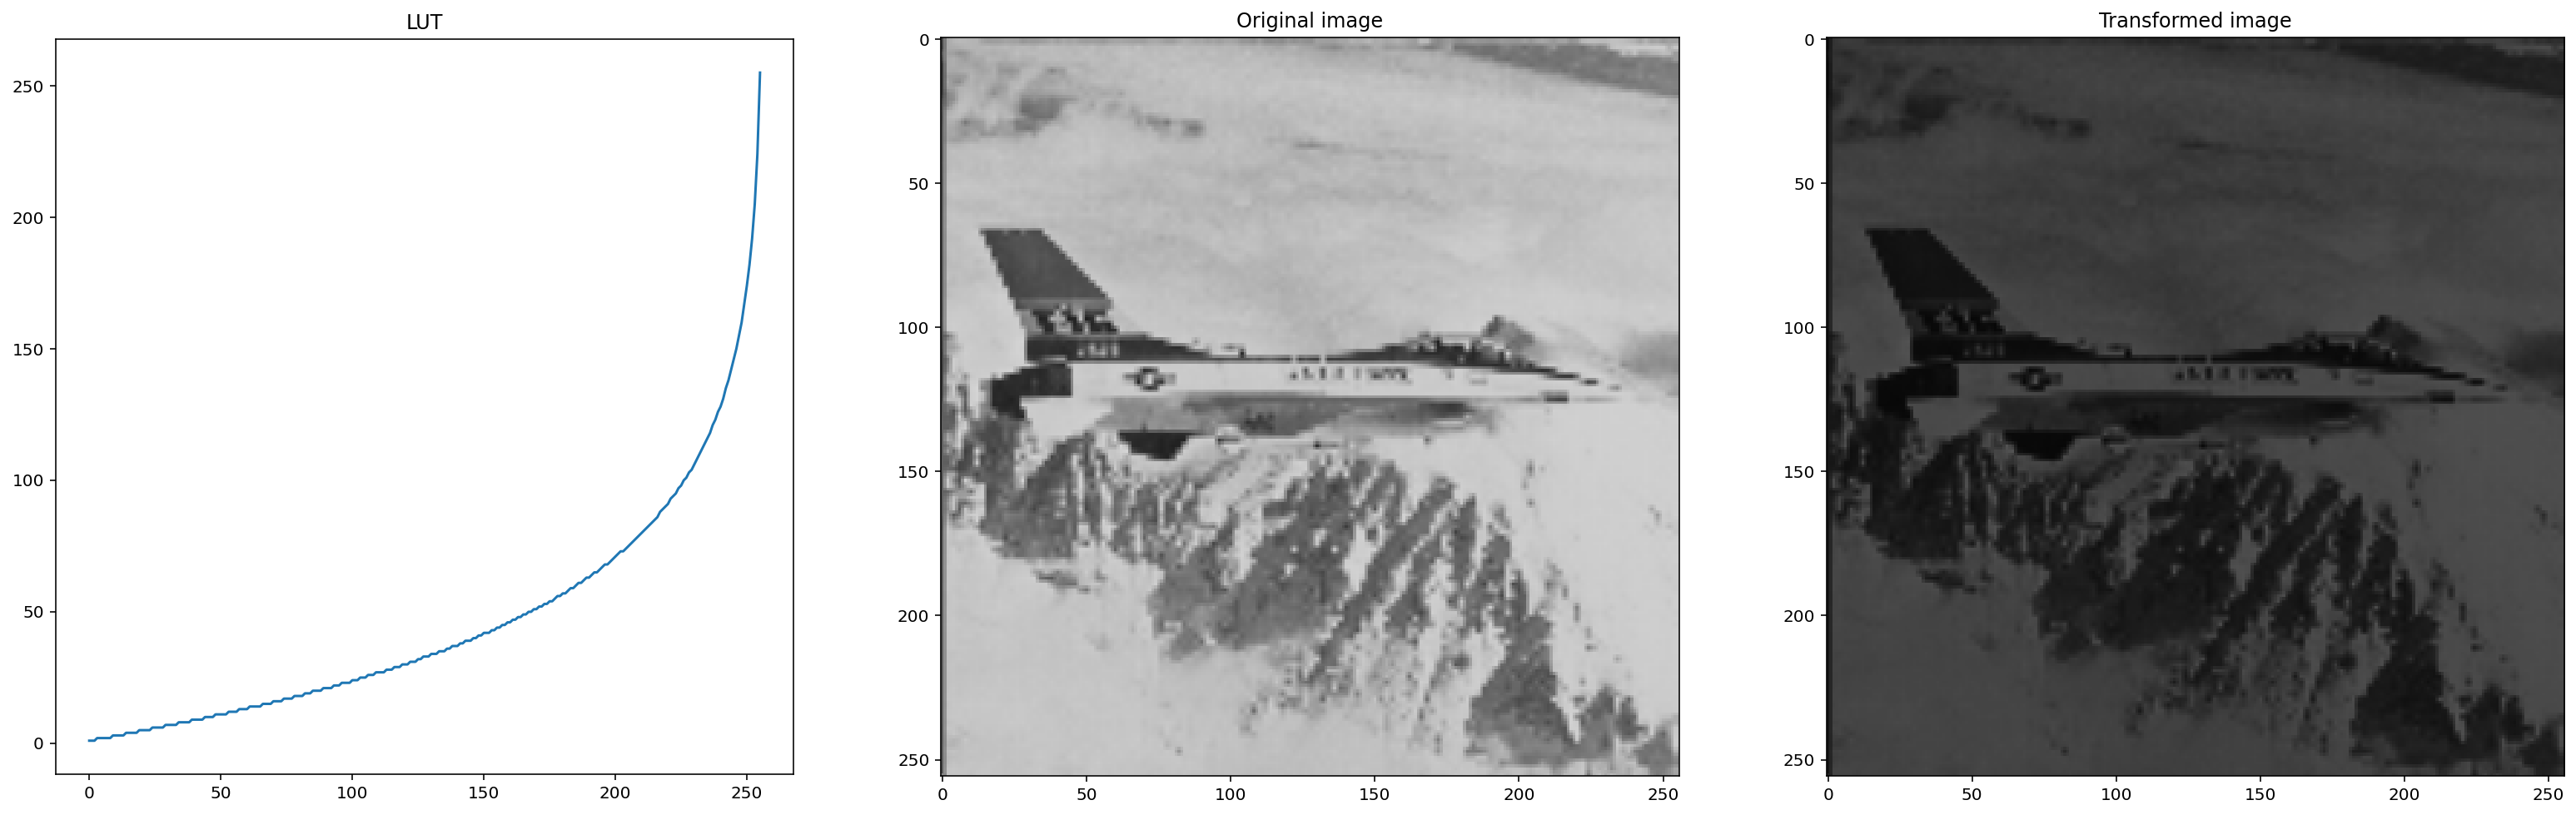

In [14]:
LUT(img, lut.odwlog)

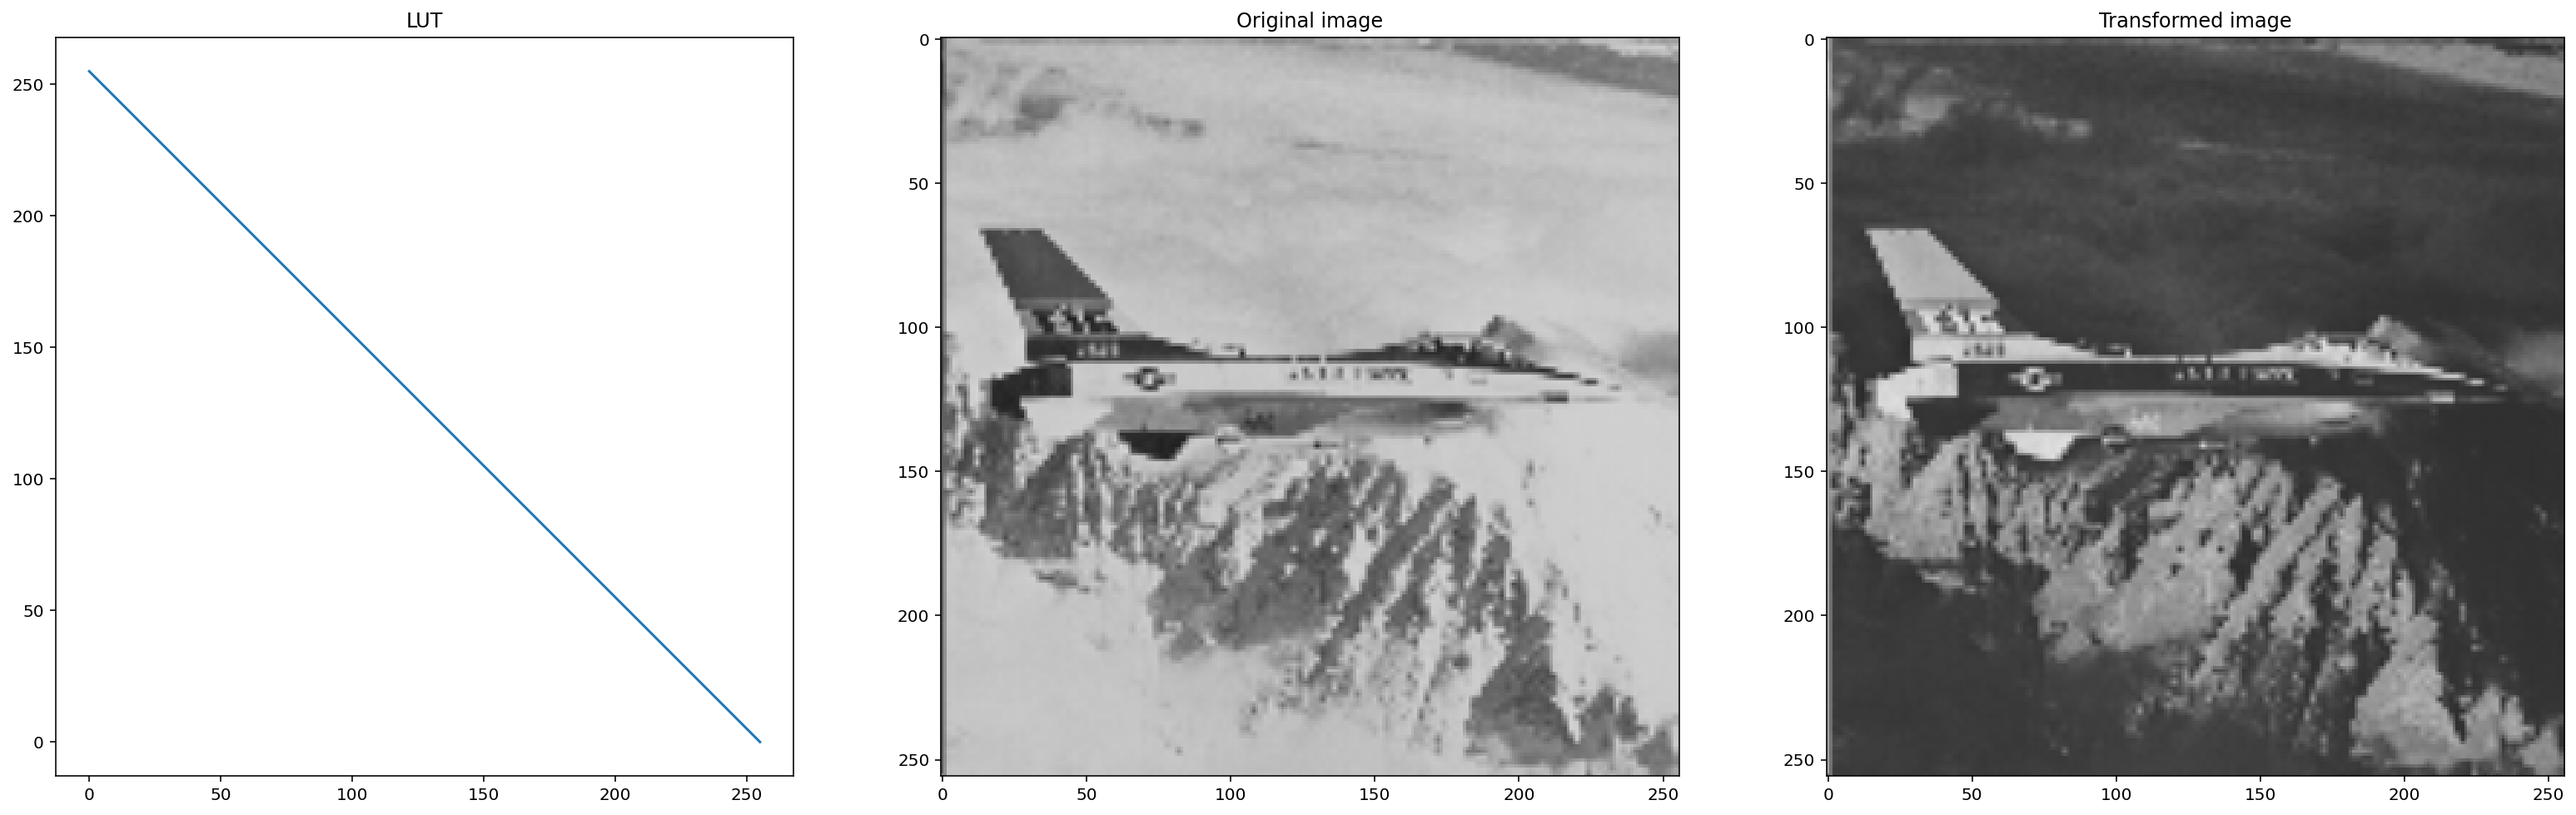

In [15]:
LUT(img, lut.odwrotna)

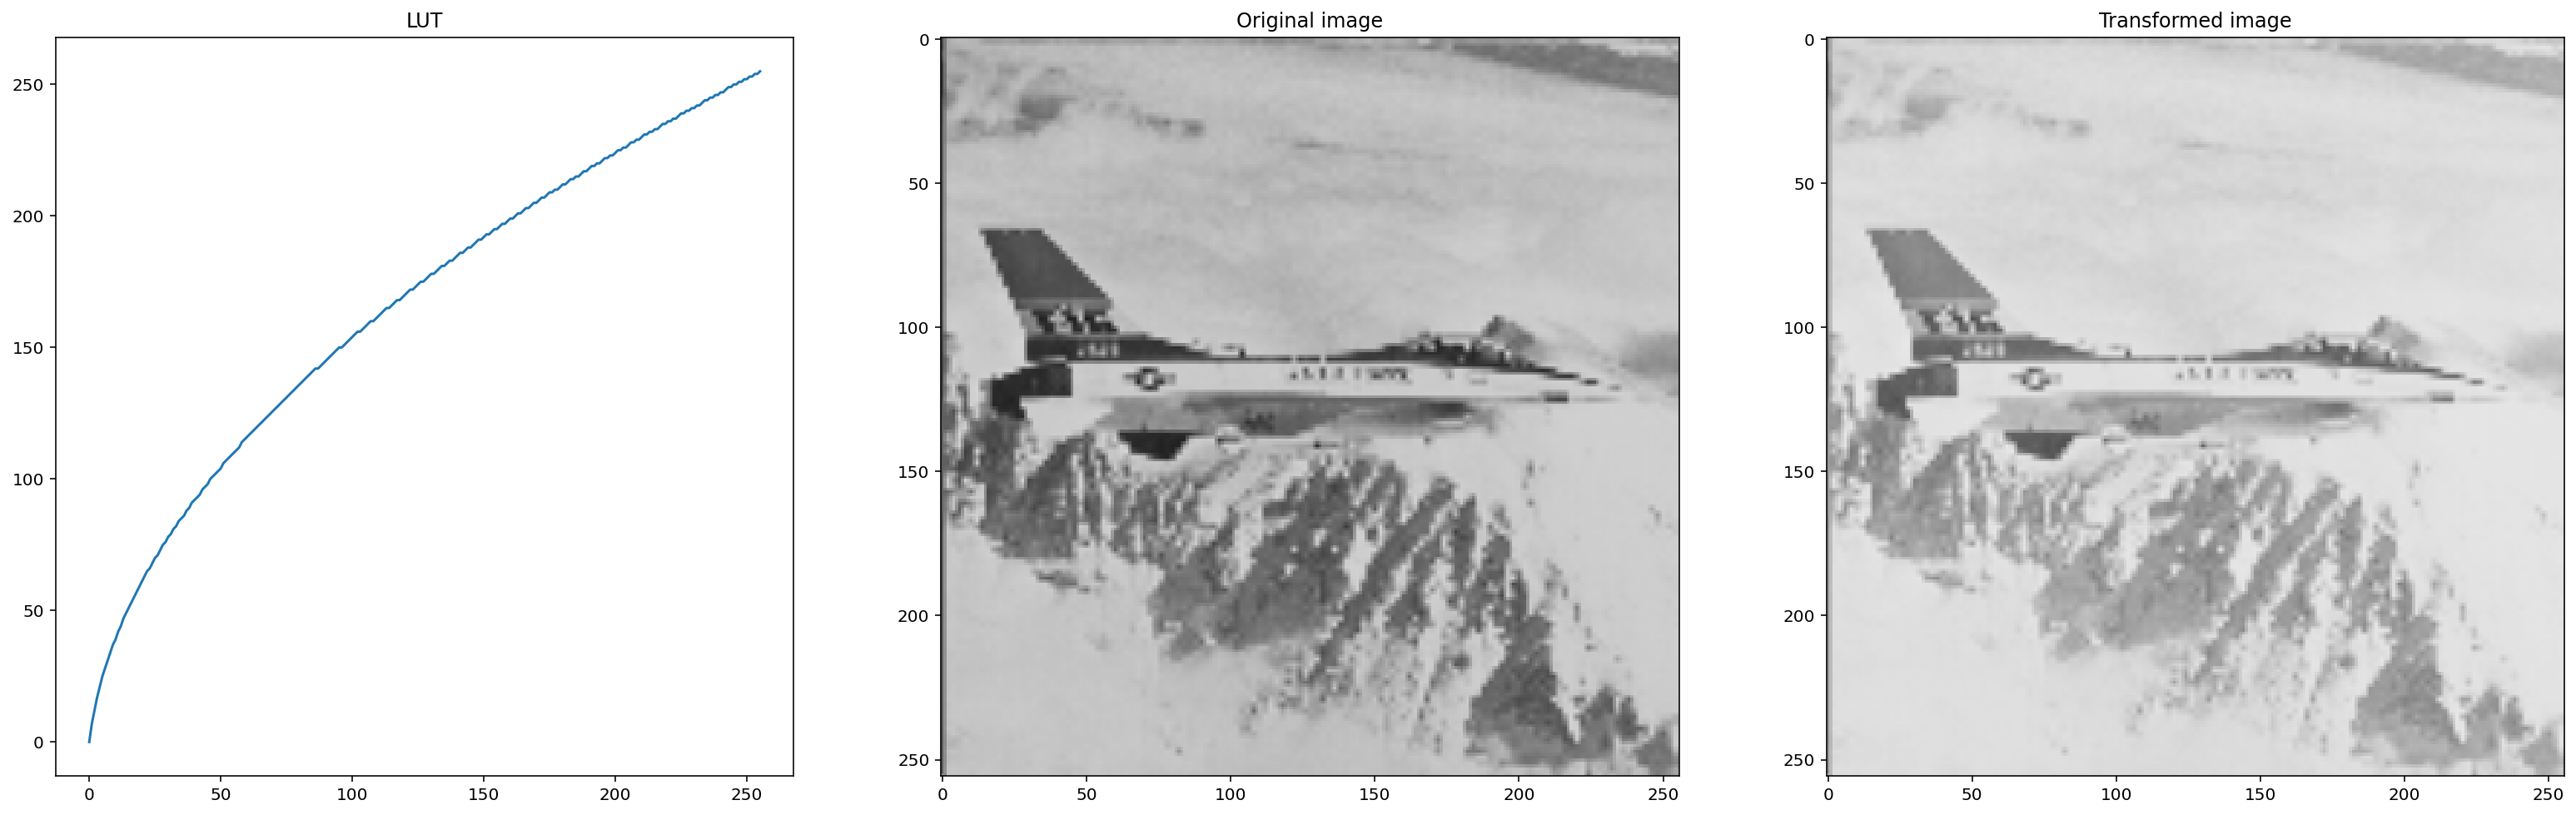

In [16]:
LUT(img, lut.pierwiastkowa)

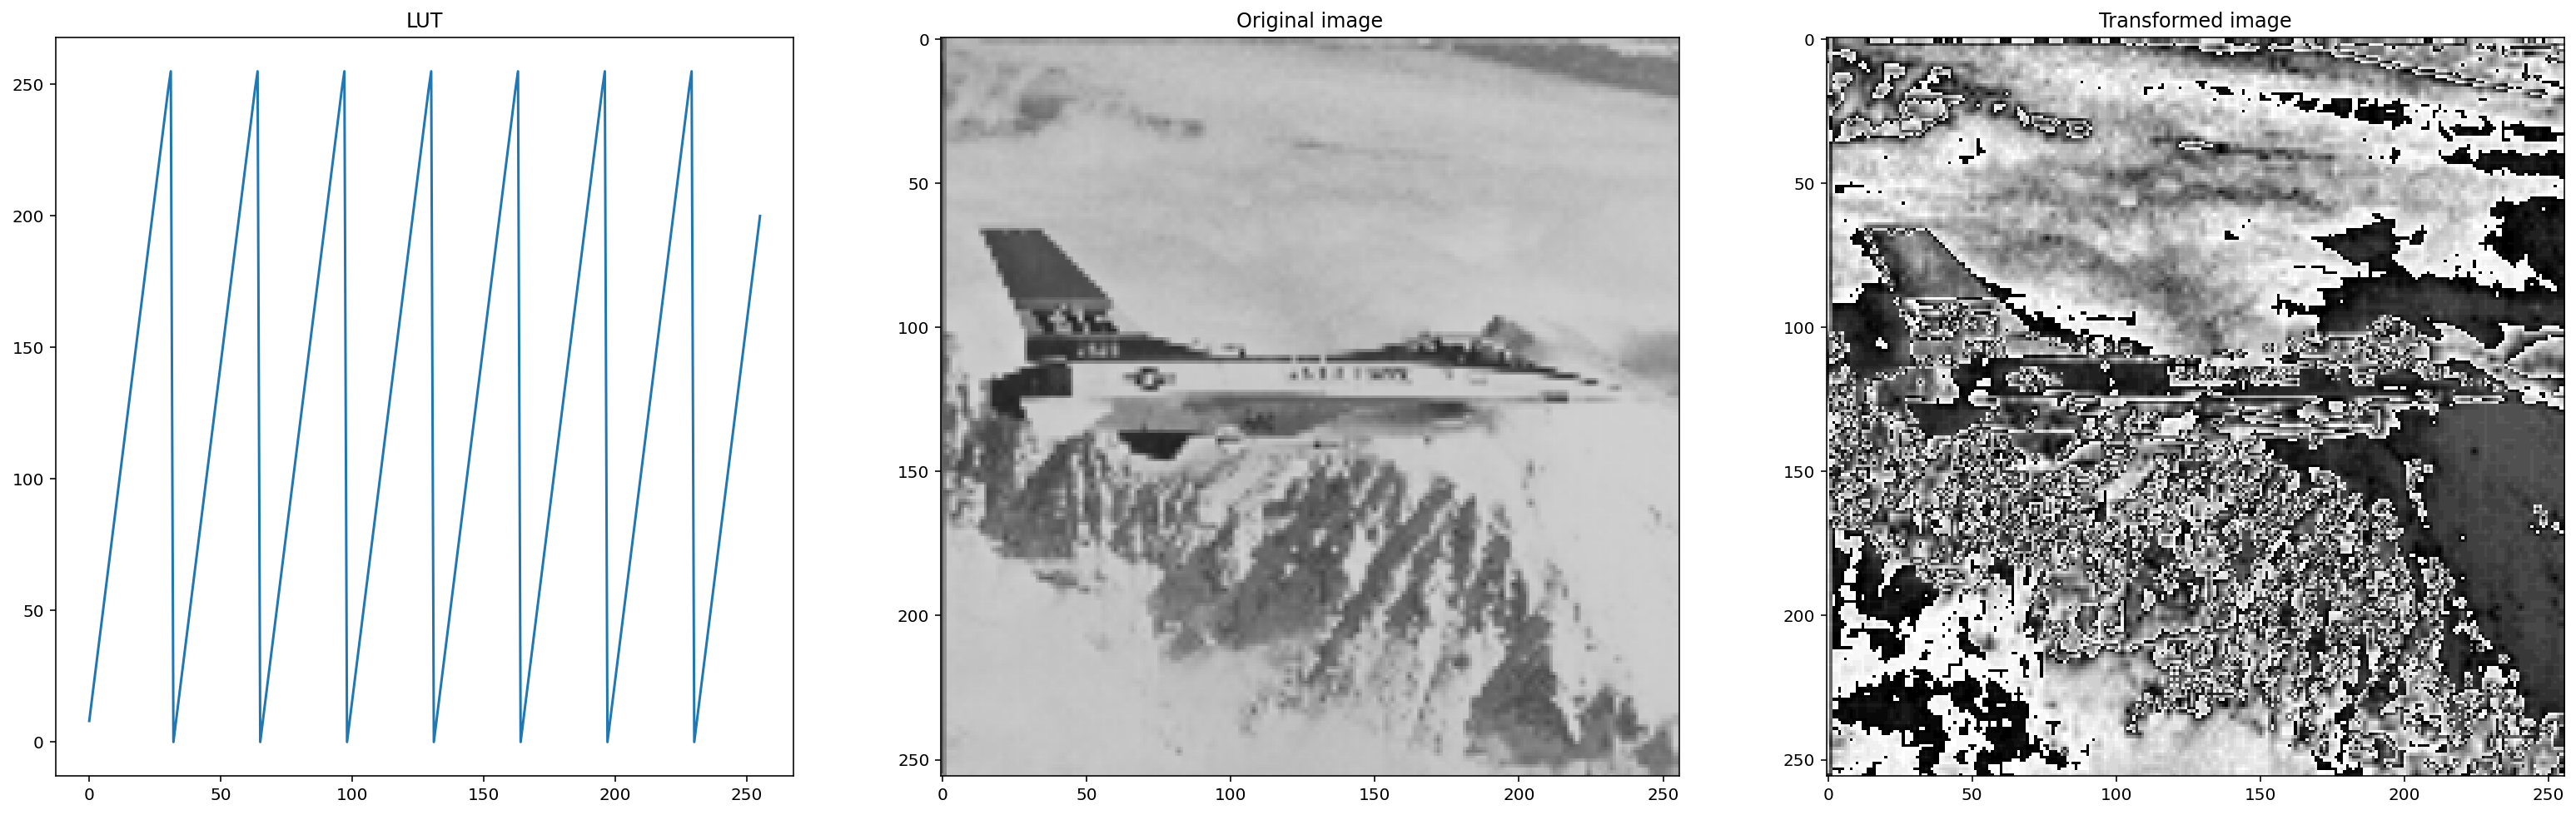

In [17]:
LUT(img, lut.pila)

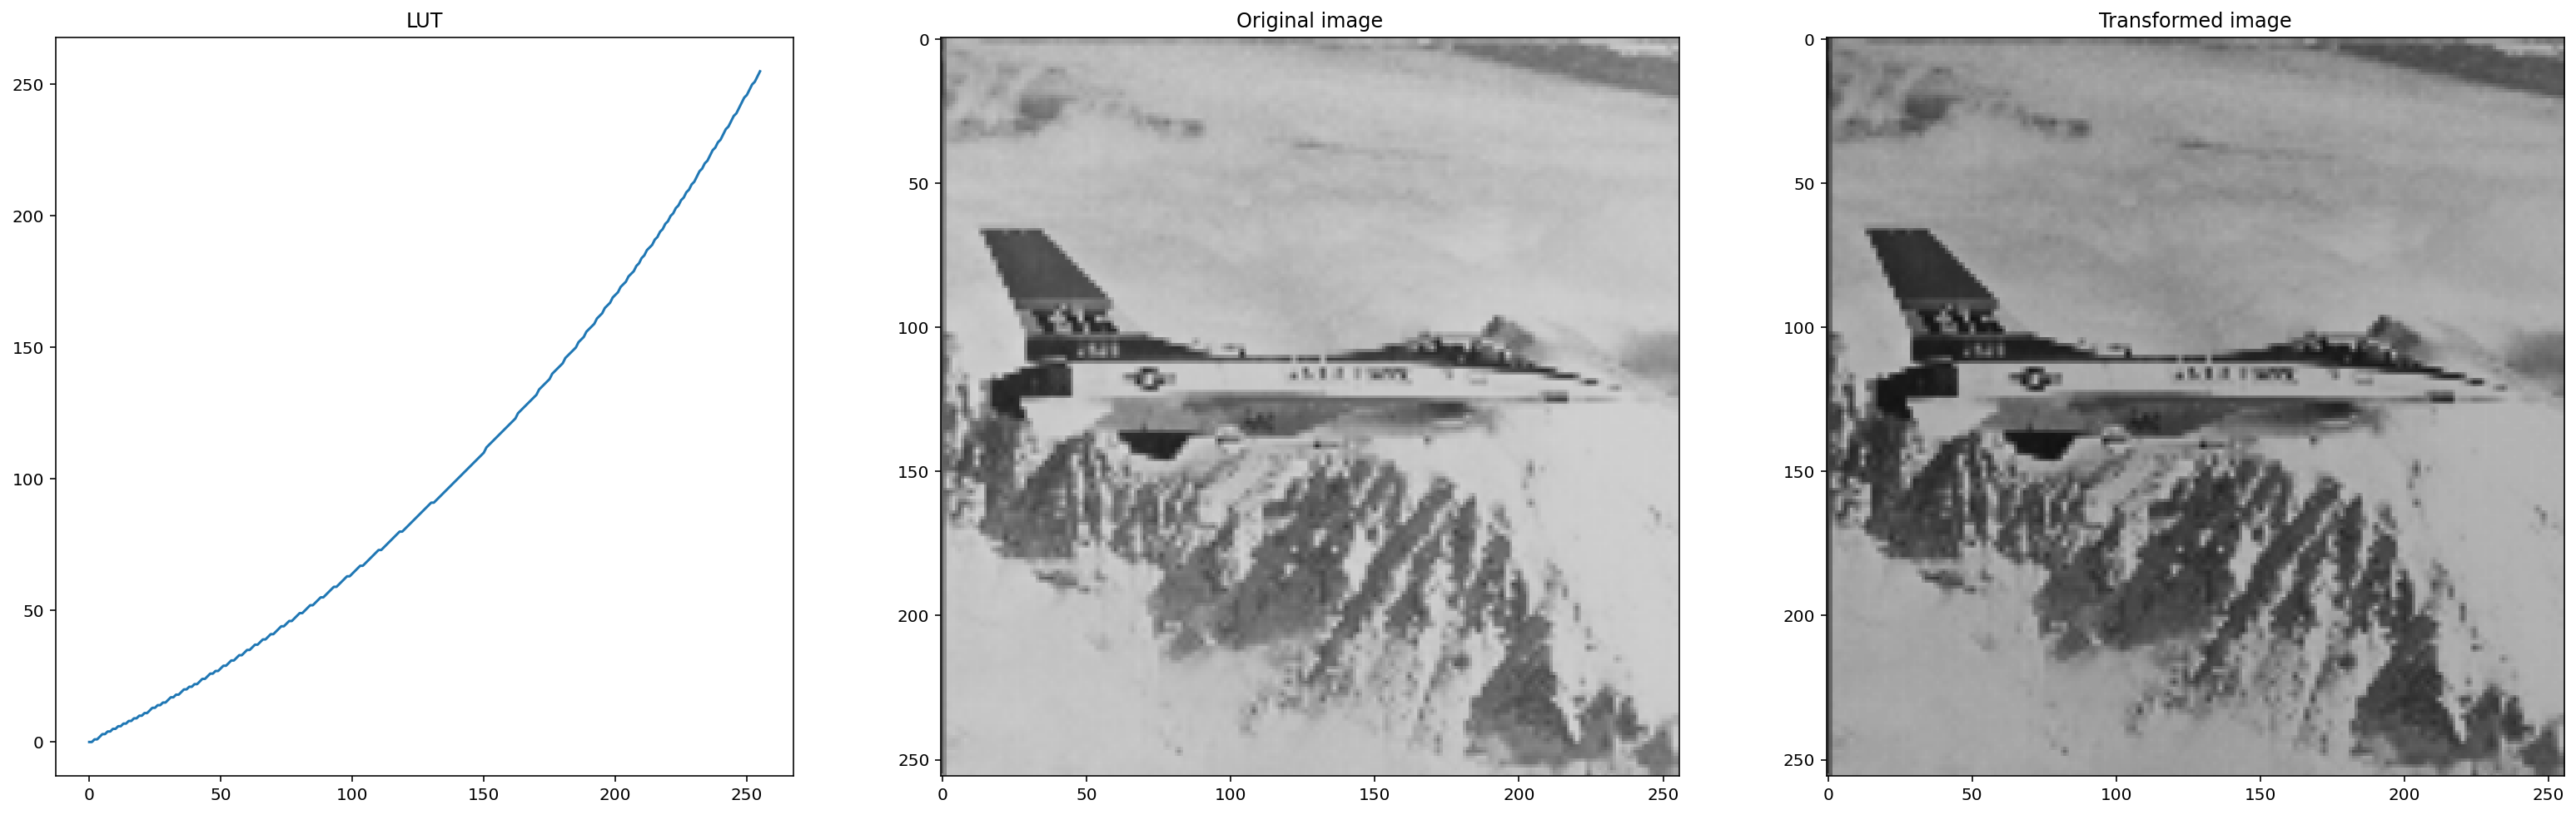

In [18]:
LUT(img, lut.wykladnicza)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

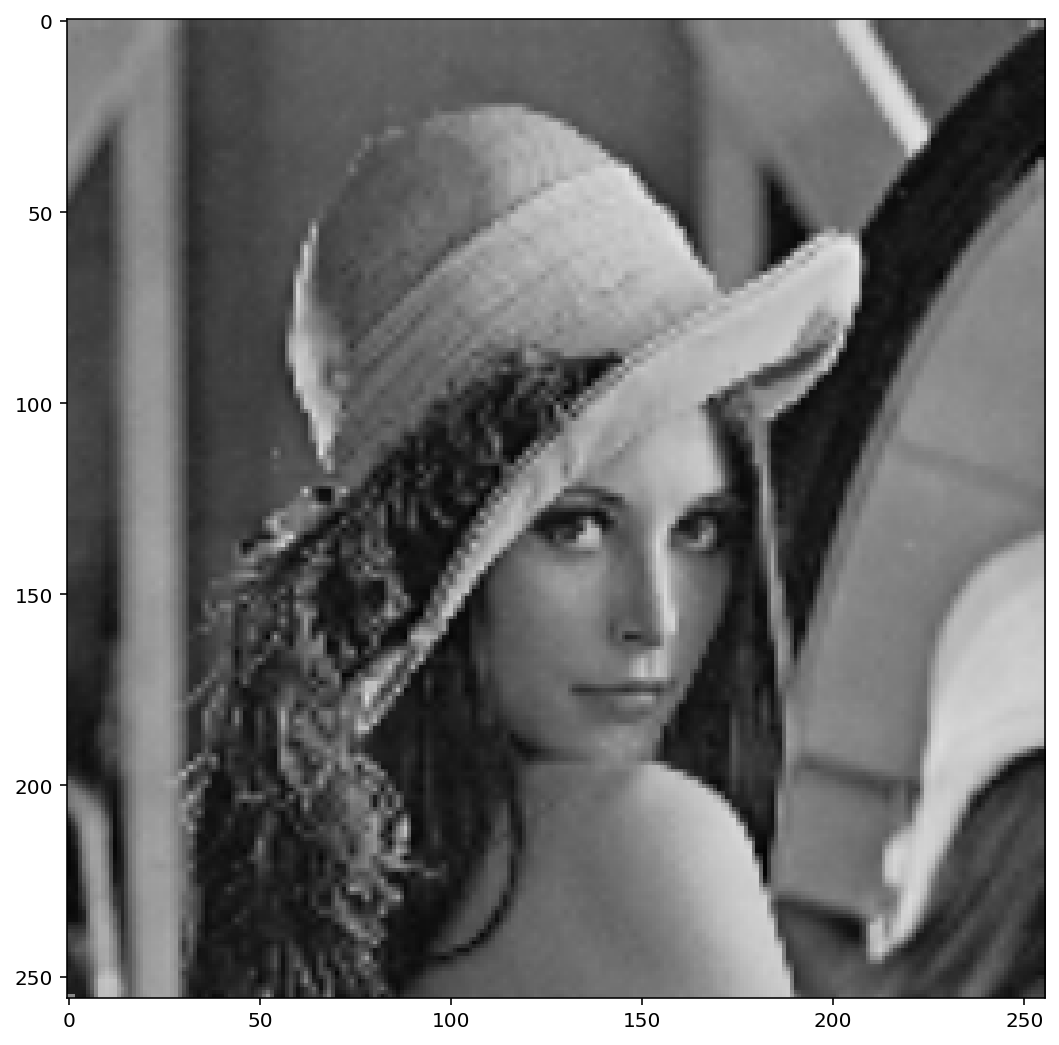

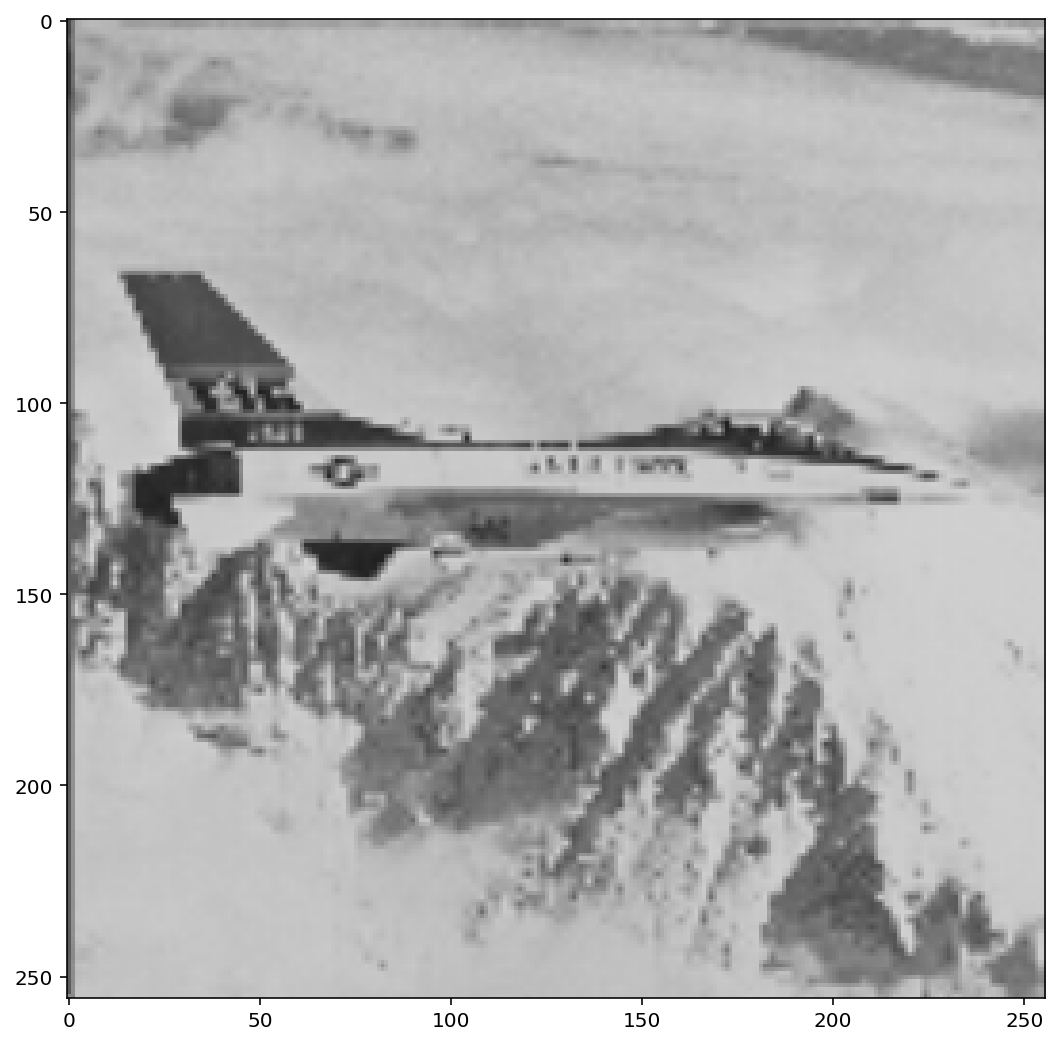

In [19]:
lena_img = cv2.imread('lena.bmp')
jet_img = cv2.imread('jet.bmp')

plt.imshow(lena_img)
plt.show()

plt.imshow(jet_img)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

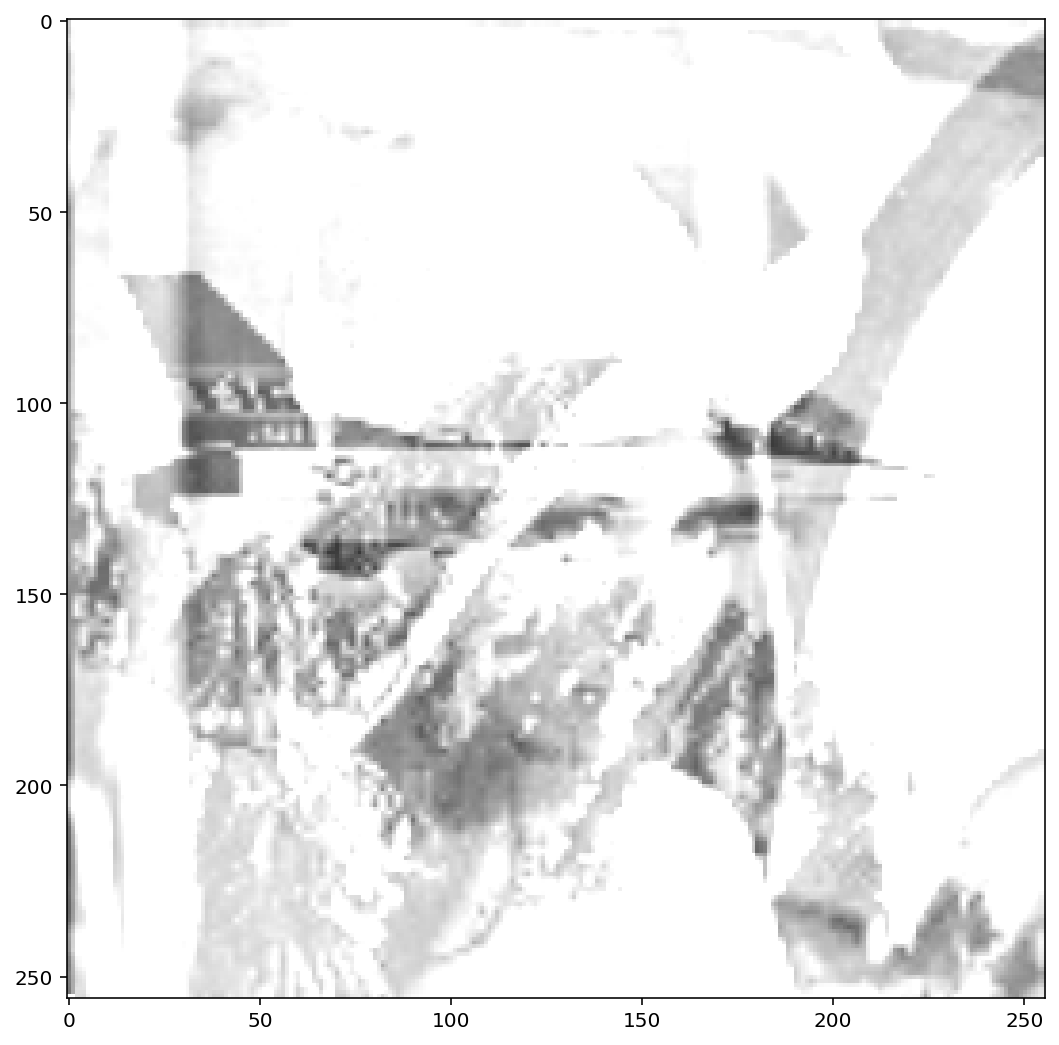

In [20]:
img_added = cv2.add(lena_img, jet_img)

plt.imshow(img_added)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

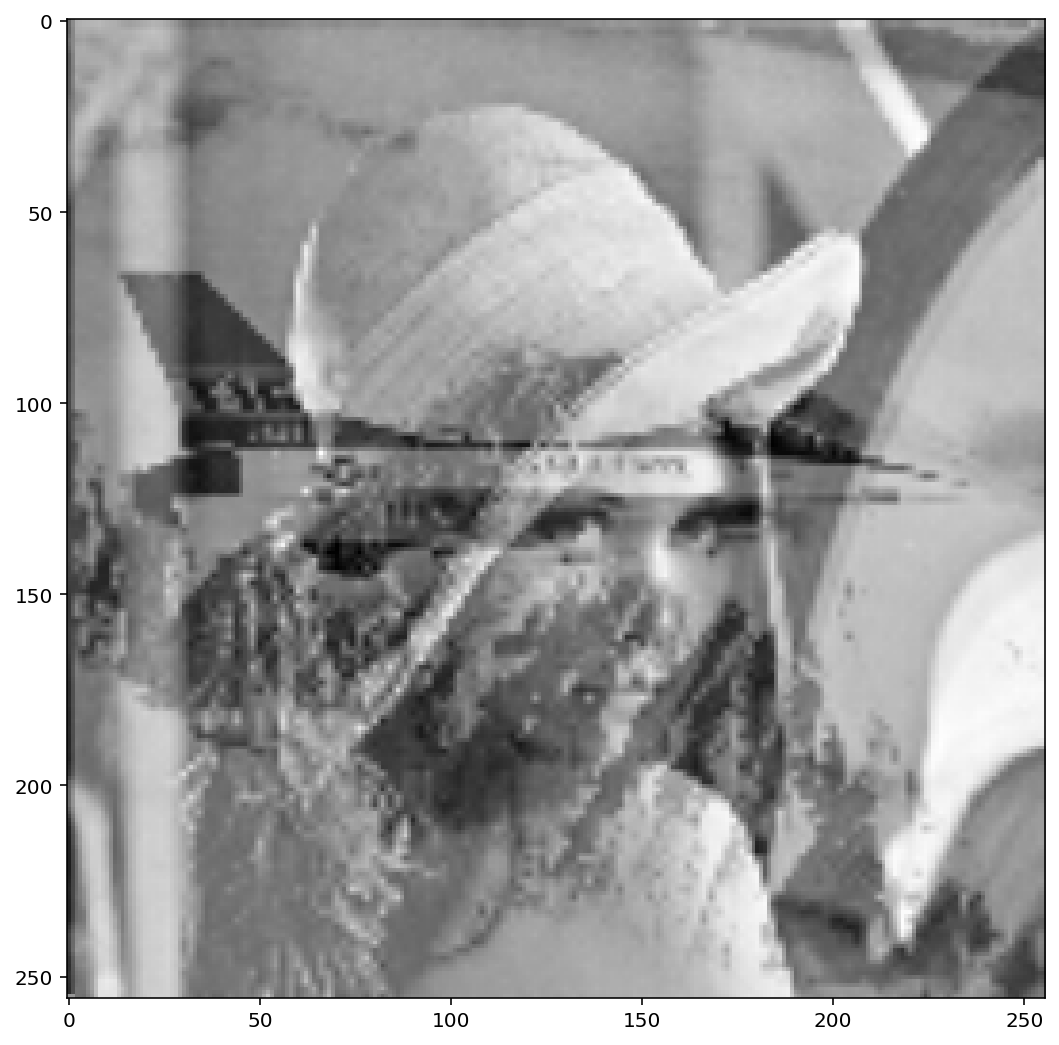

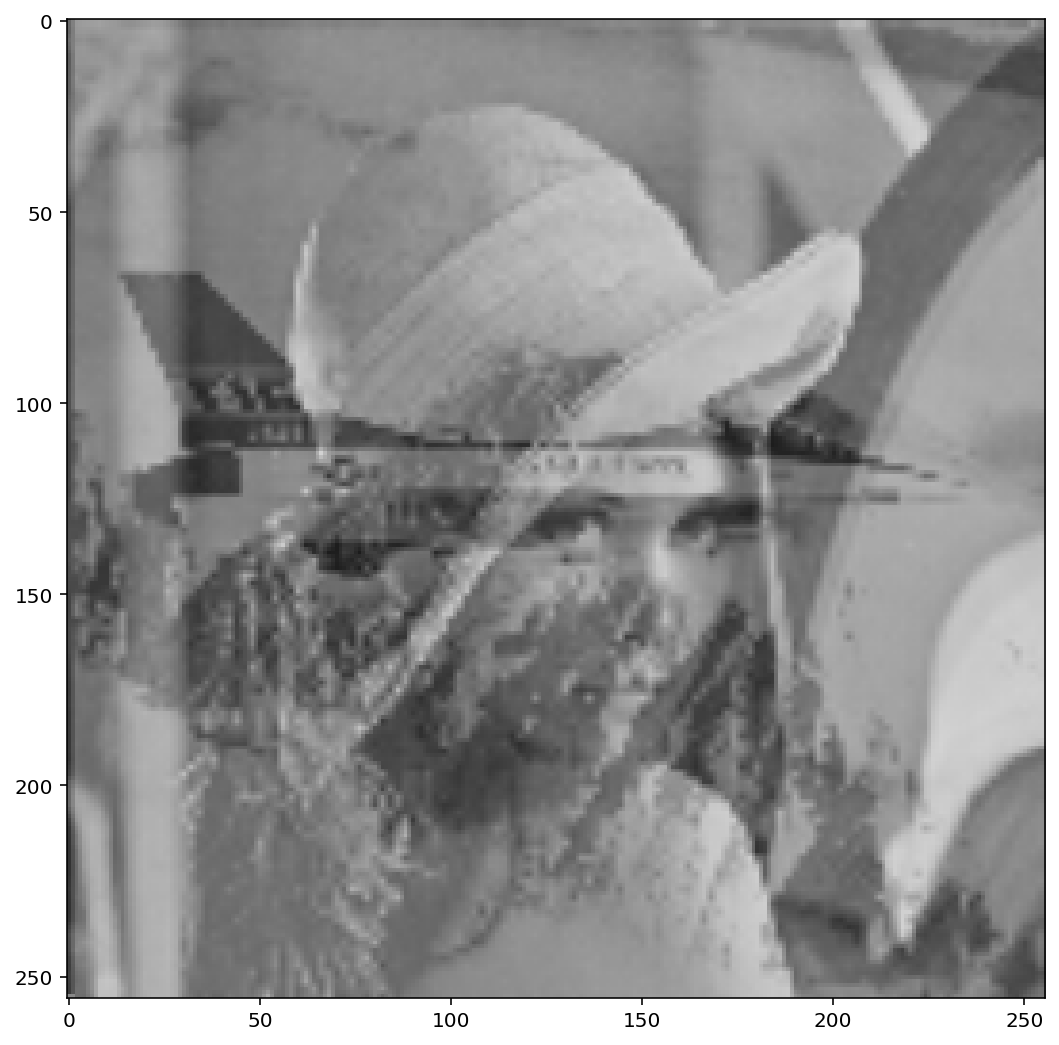

In [21]:
img_added = cv2.add(jet_img.astype('uint16'), lena_img.astype('uint16'))
img_scaled = np.interp(img_added, (img_added.min(), img_added.max()), (0, 255)).astype('uint8')

plt.imshow(img_scaled)
plt.show()

img_scaled2 = (img_added // 2).astype('uint8')

plt.imshow(img_scaled2)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

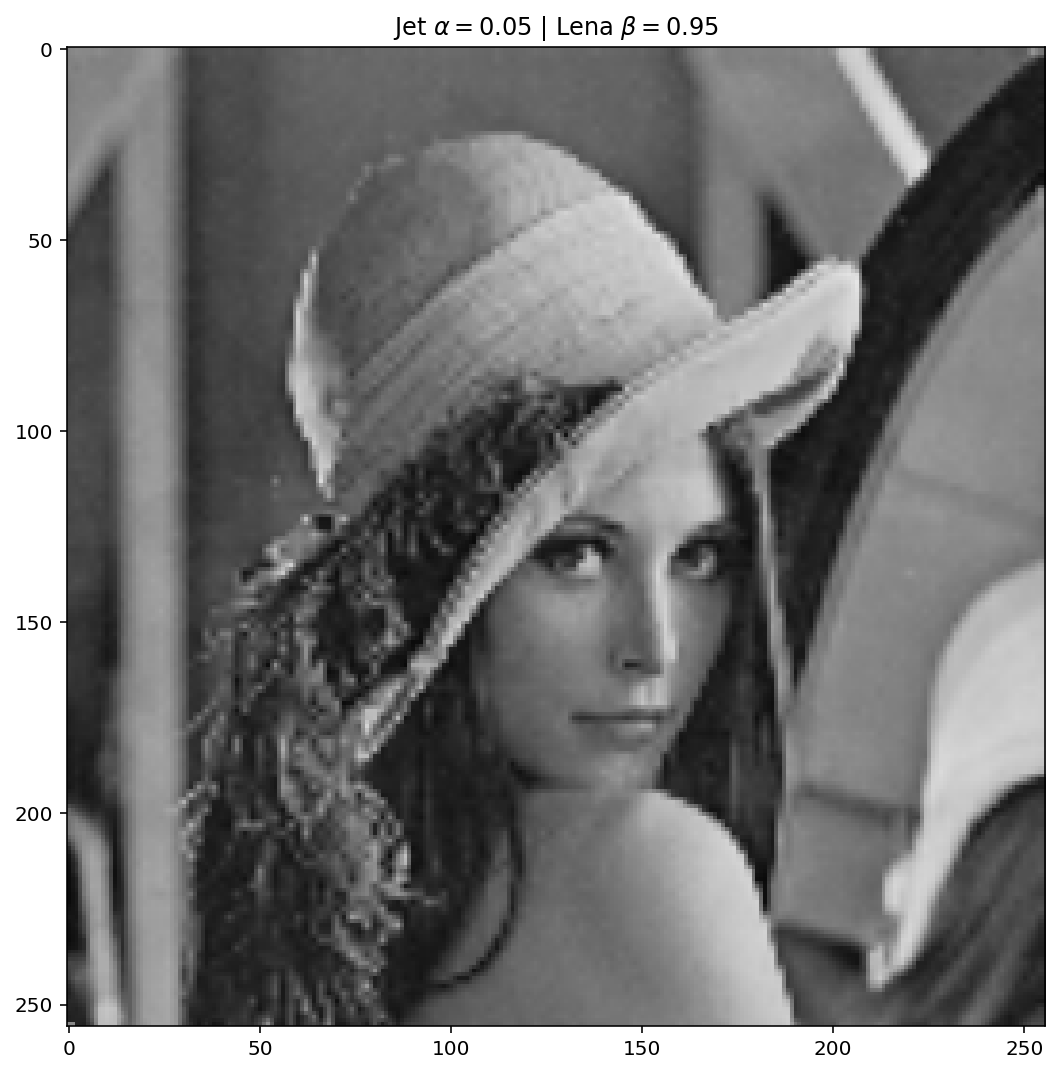

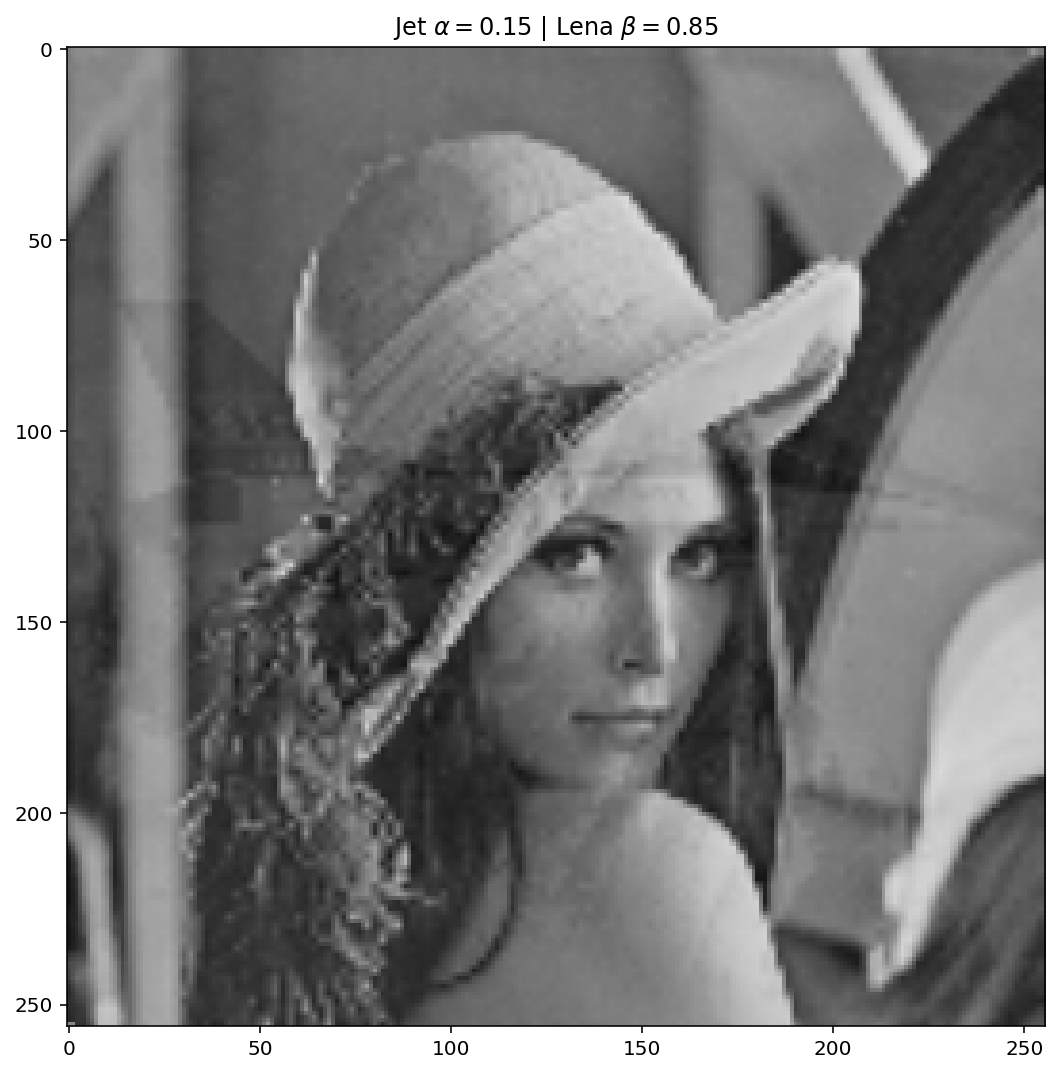

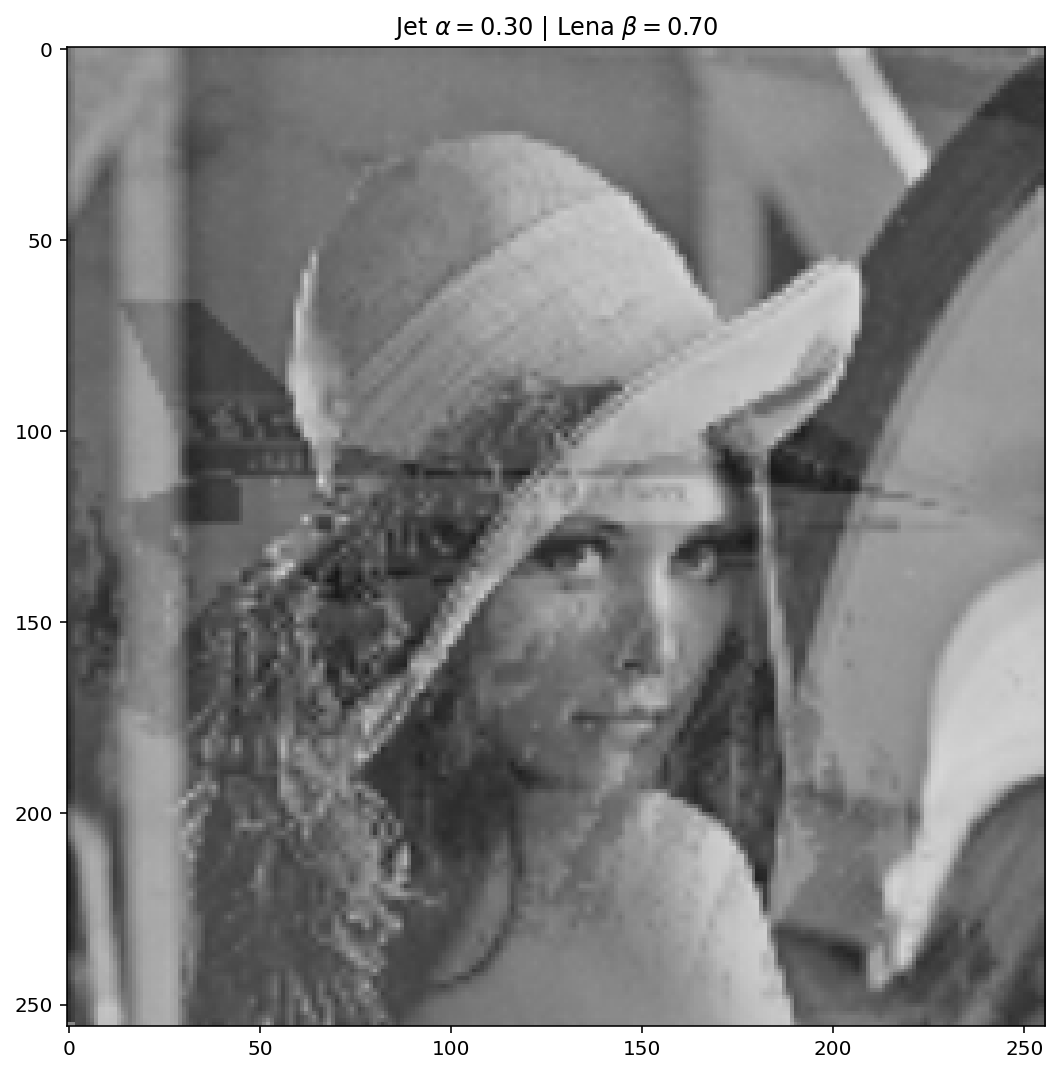

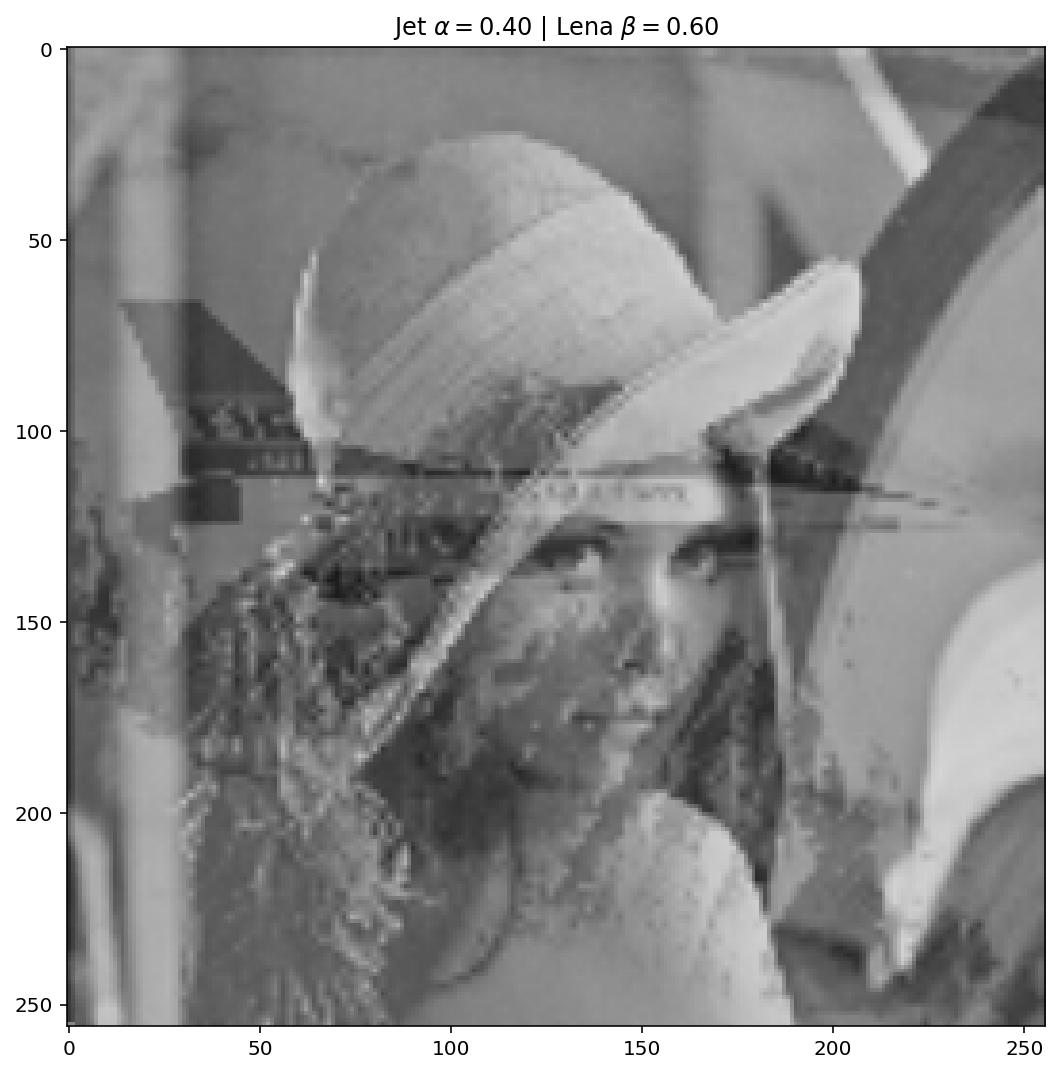

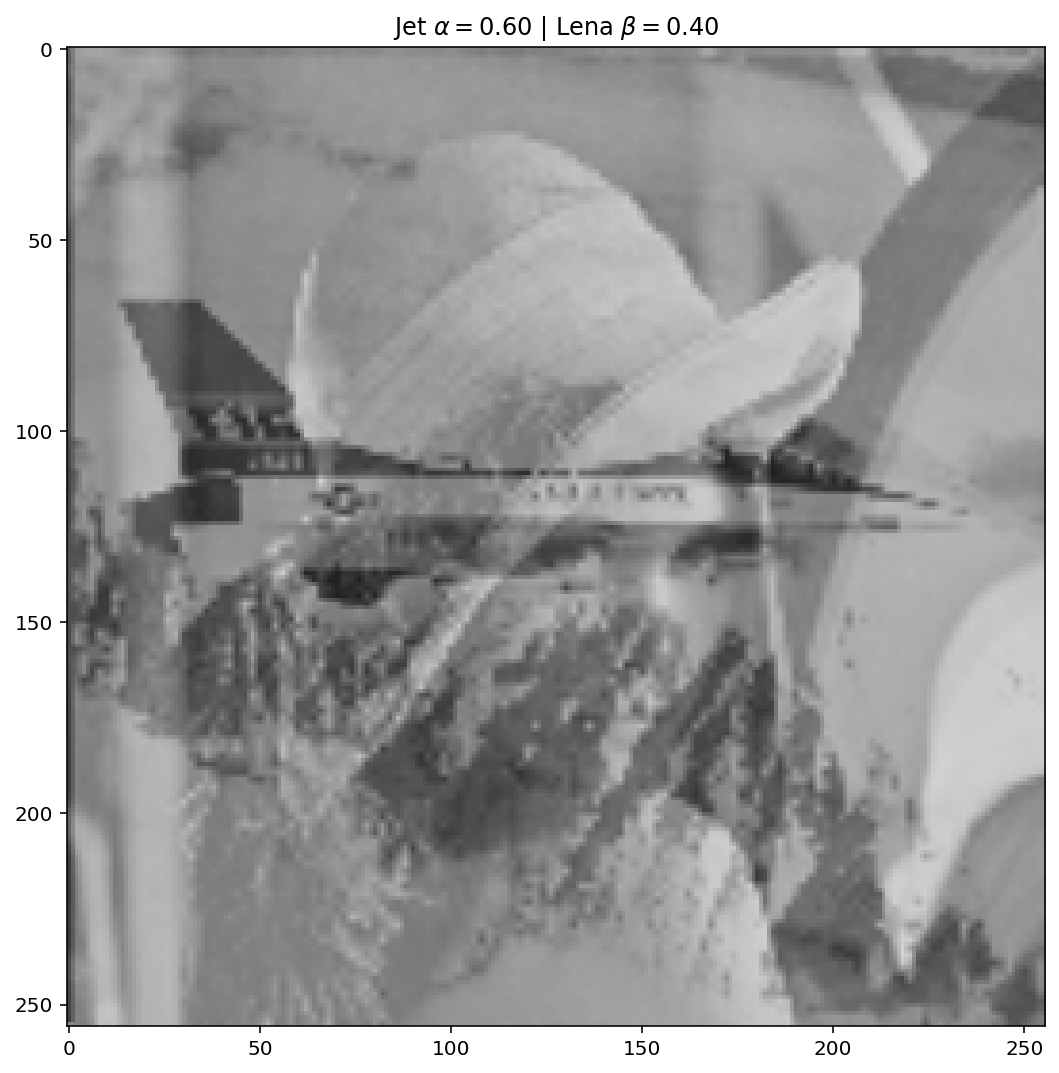

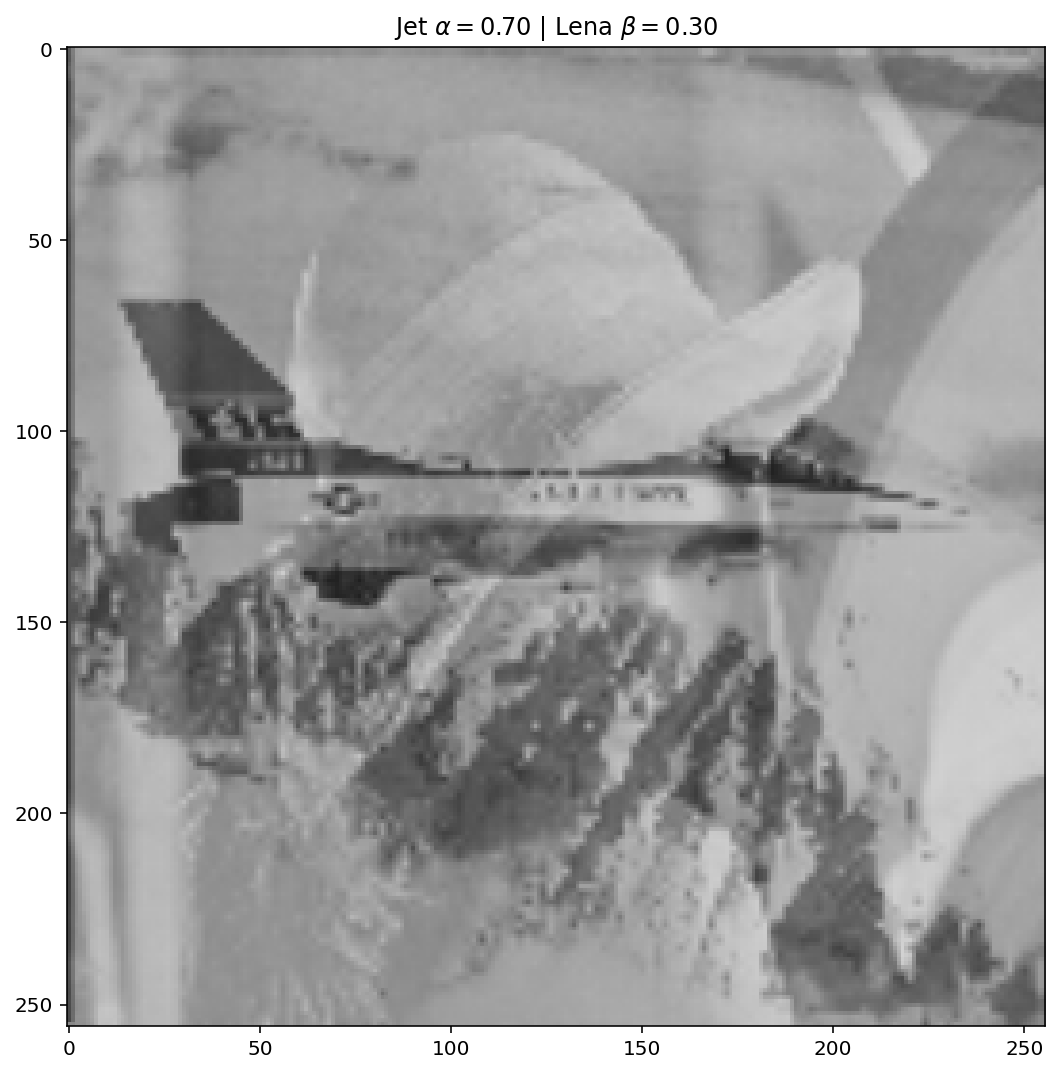

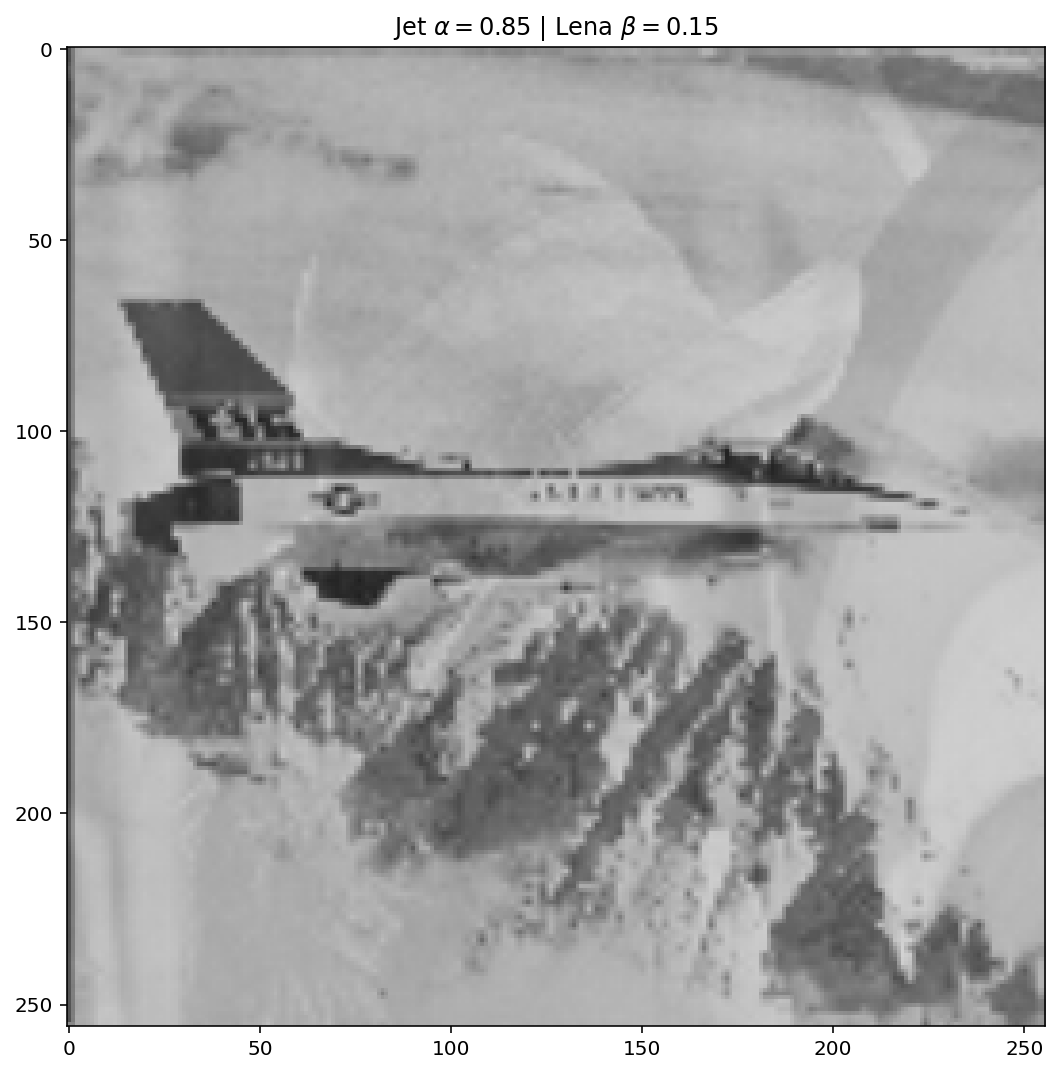

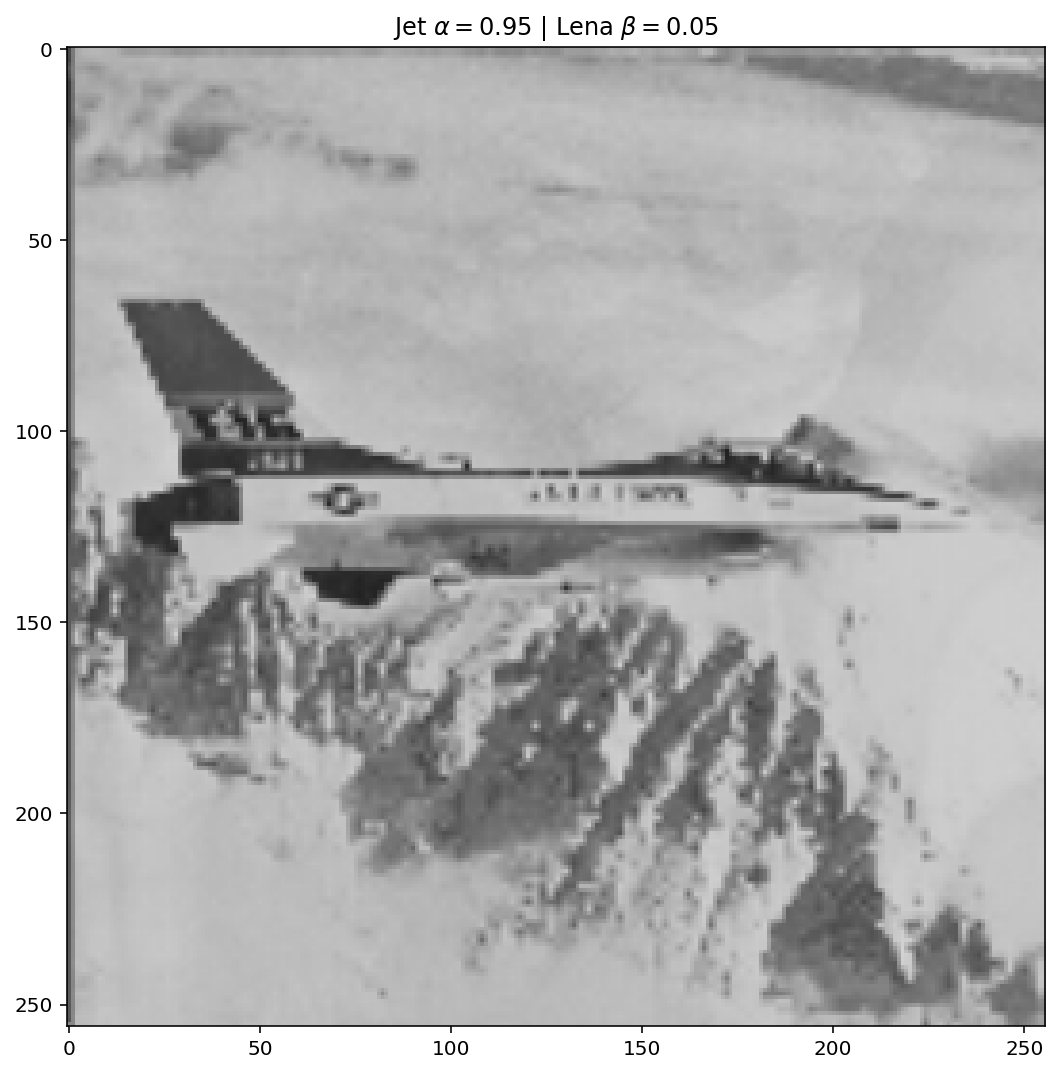

In [22]:
for alpha in [0.05, 0.15, 0.3, 0.4, 0.6, 0.7, 0.85, 0.95]:
    img_added = cv2.addWeighted(jet_img, alpha, lena_img, 1 - alpha, 0)
    
    plt.imshow(img_added)
    plt.title(f'Jet $\\alpha = {alpha:.2f}$ | Lena $\\beta = {1-alpha:.2f}$')
    plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

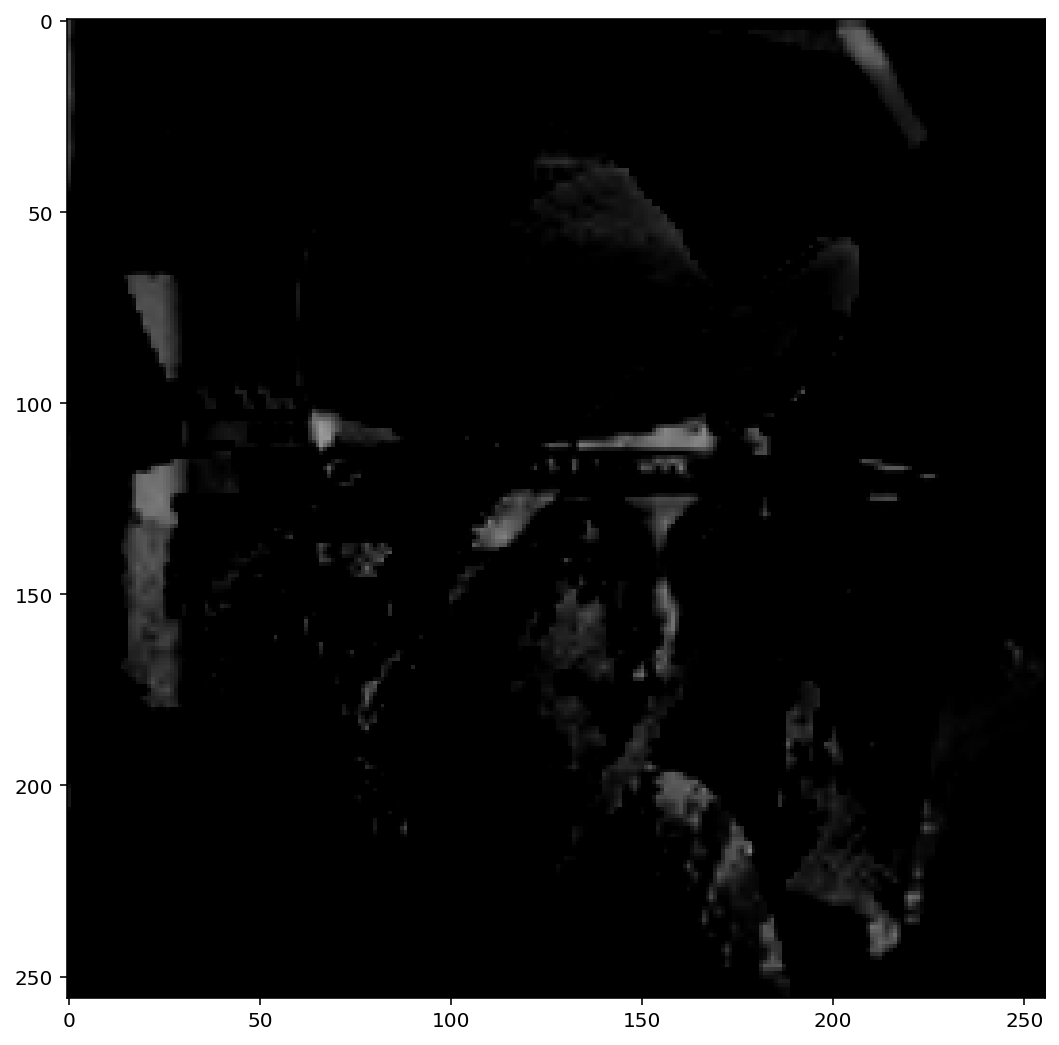

In [23]:
img_subtracted = cv2.subtract(lena_img, jet_img)

plt.imshow(img_subtracted)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

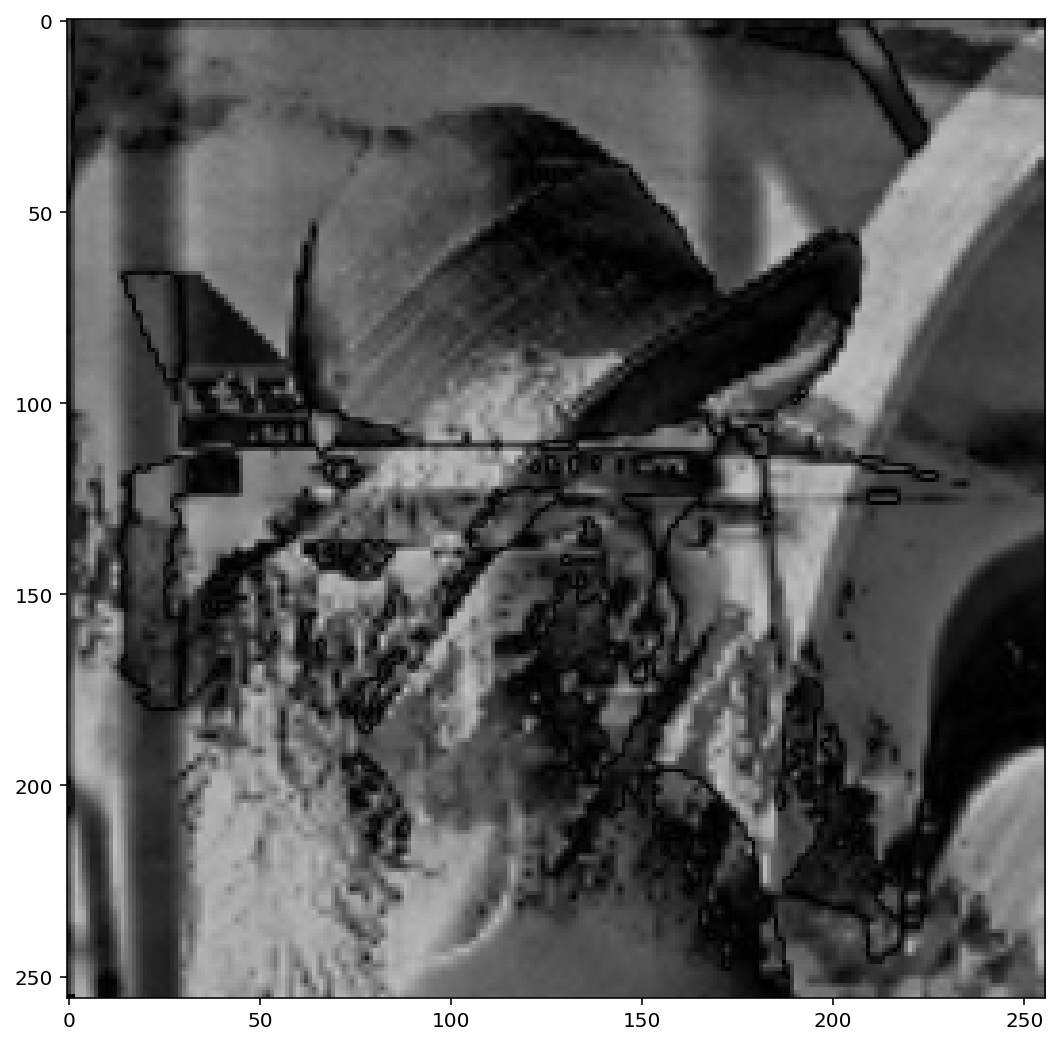

In [24]:
img_subtracted = cv2.subtract(lena_img.astype(np.int16), jet_img.astype(np.int16))

img_normalized = np.abs(img_subtracted)

plt.imshow(img_normalized)
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

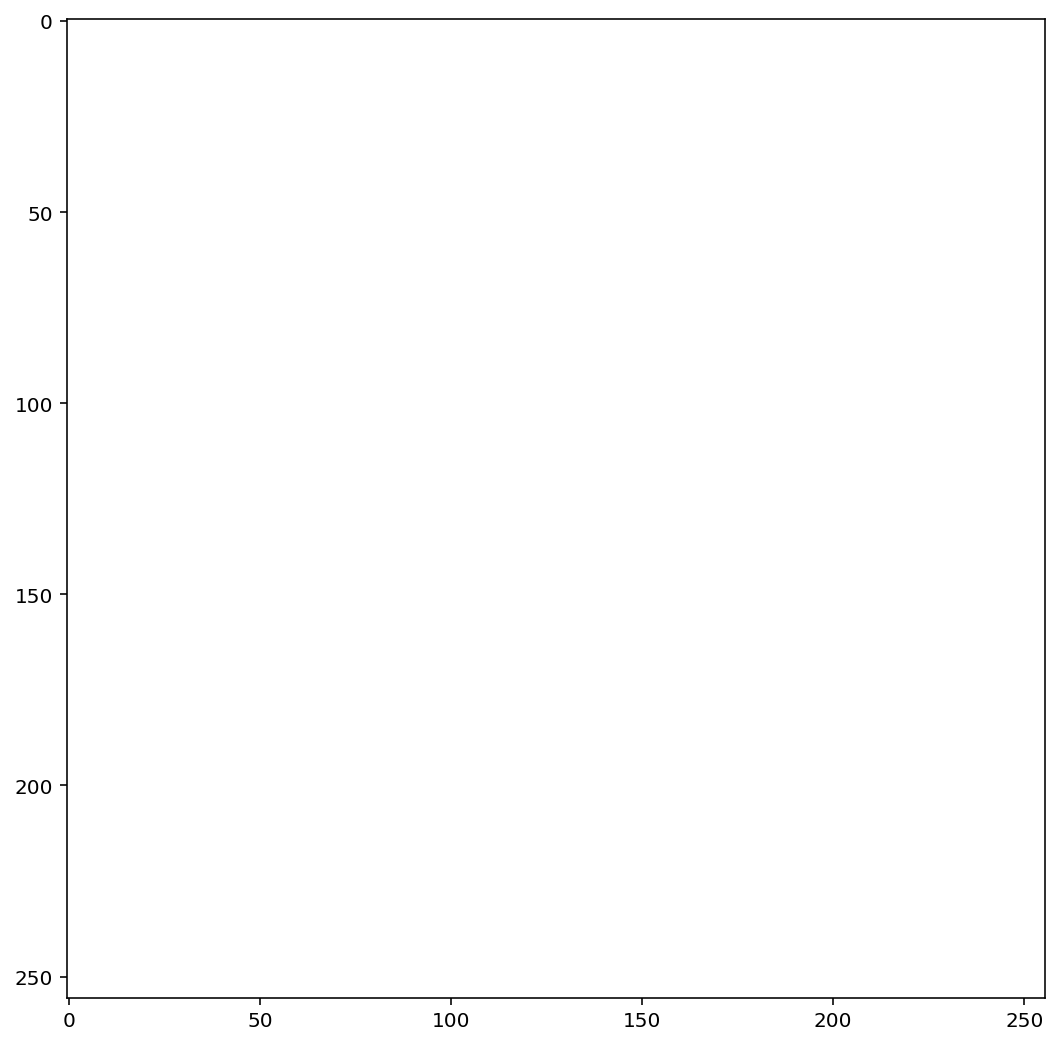

In [25]:
img_multiplied = cv2.multiply(lena_img.astype(np.uint16), jet_img.astype(np.uint16))

plt.imshow(np.clip(img_multiplied, 0, 255))
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

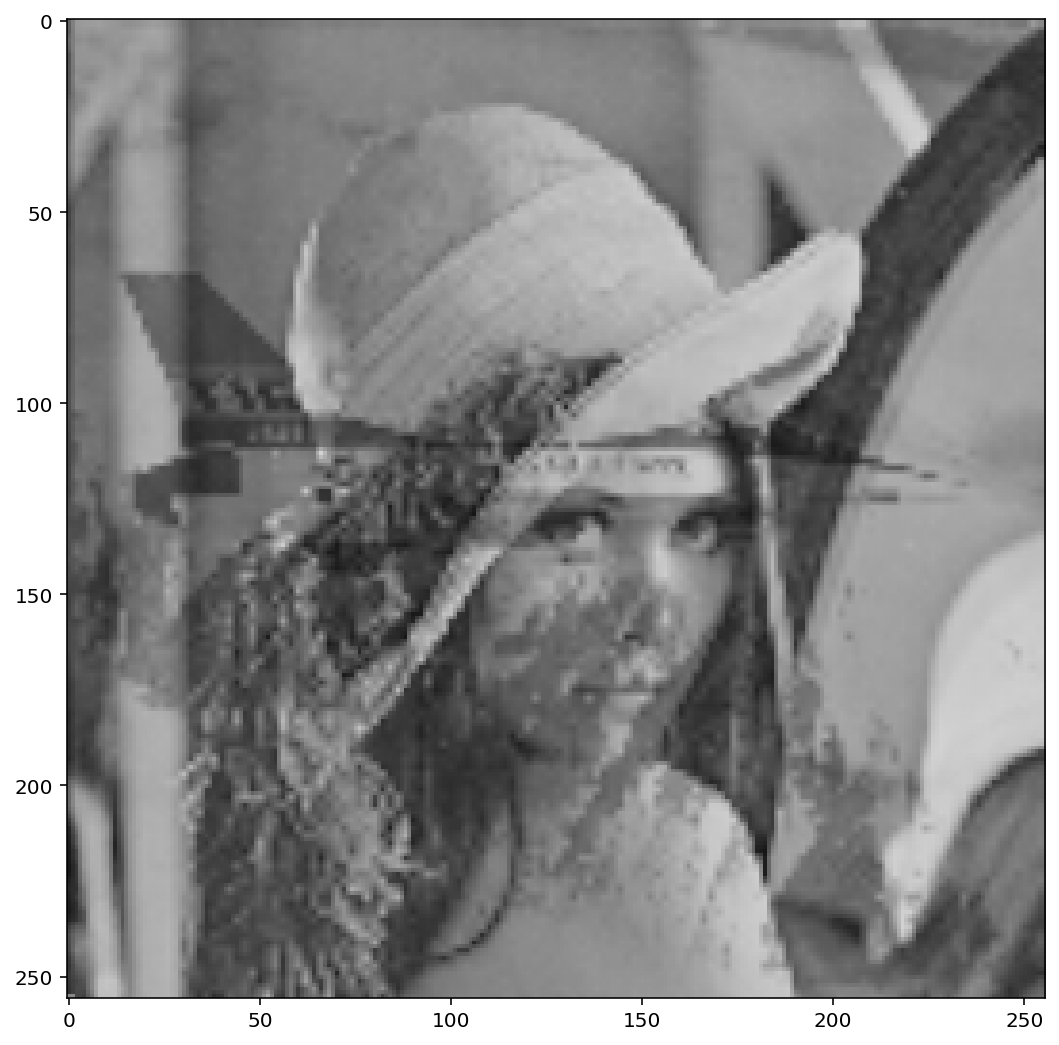

In [26]:
img_multiplied = cv2.multiply(lena_img.astype(np.uint16), jet_img.astype(np.uint16))

img_normalized = np.sqrt(img_multiplied).astype(np.uint8)

plt.imshow(img_normalized)
plt.show()

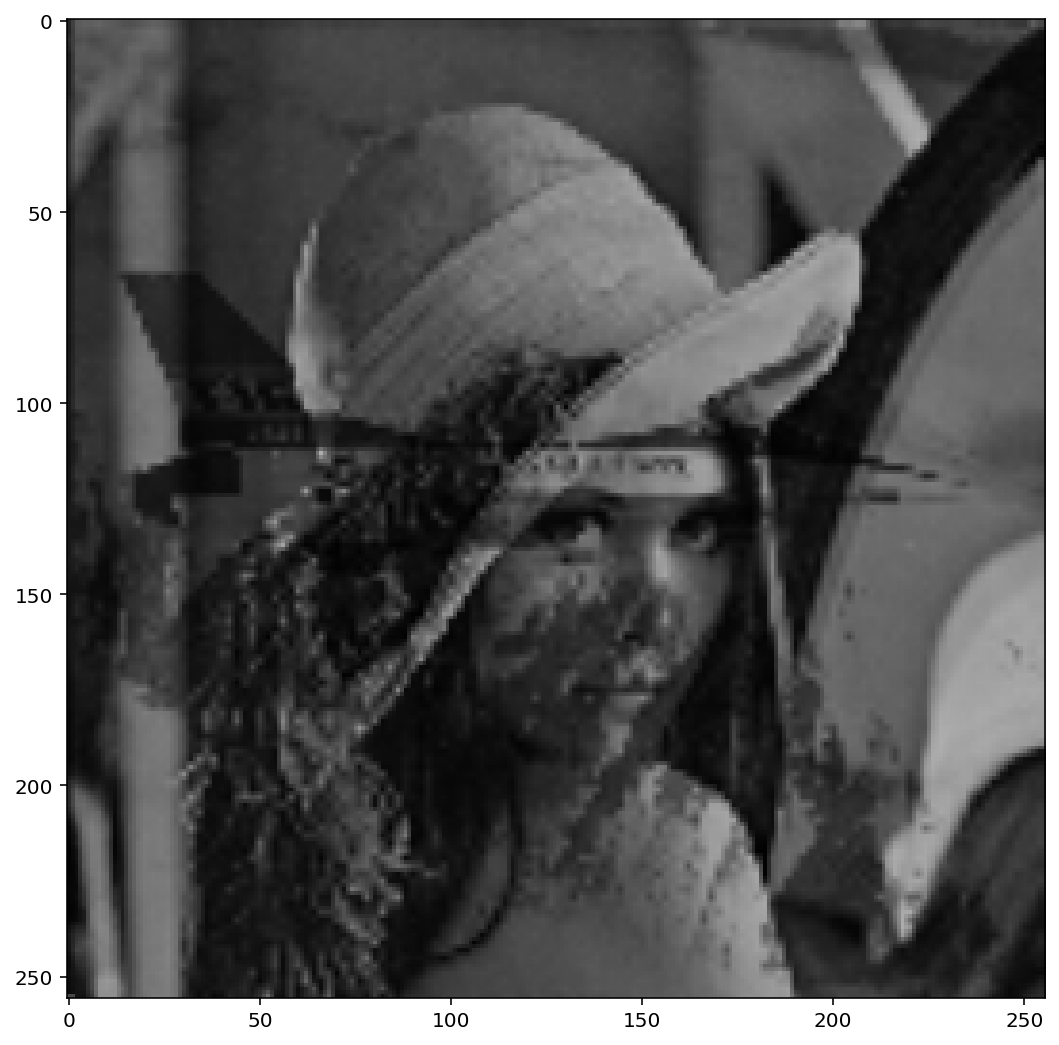

In [27]:
img_multiplied = cv2.multiply(lena_img.astype(np.uint16), jet_img.astype(np.uint16))

img_normalized = (img_multiplied // 255).astype(np.uint8)

plt.imshow(img_normalized)
plt.show()

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [28]:
if not os.path.exists('kolo.bmp'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

In [29]:
circle = cv2.imread('kolo.bmp')

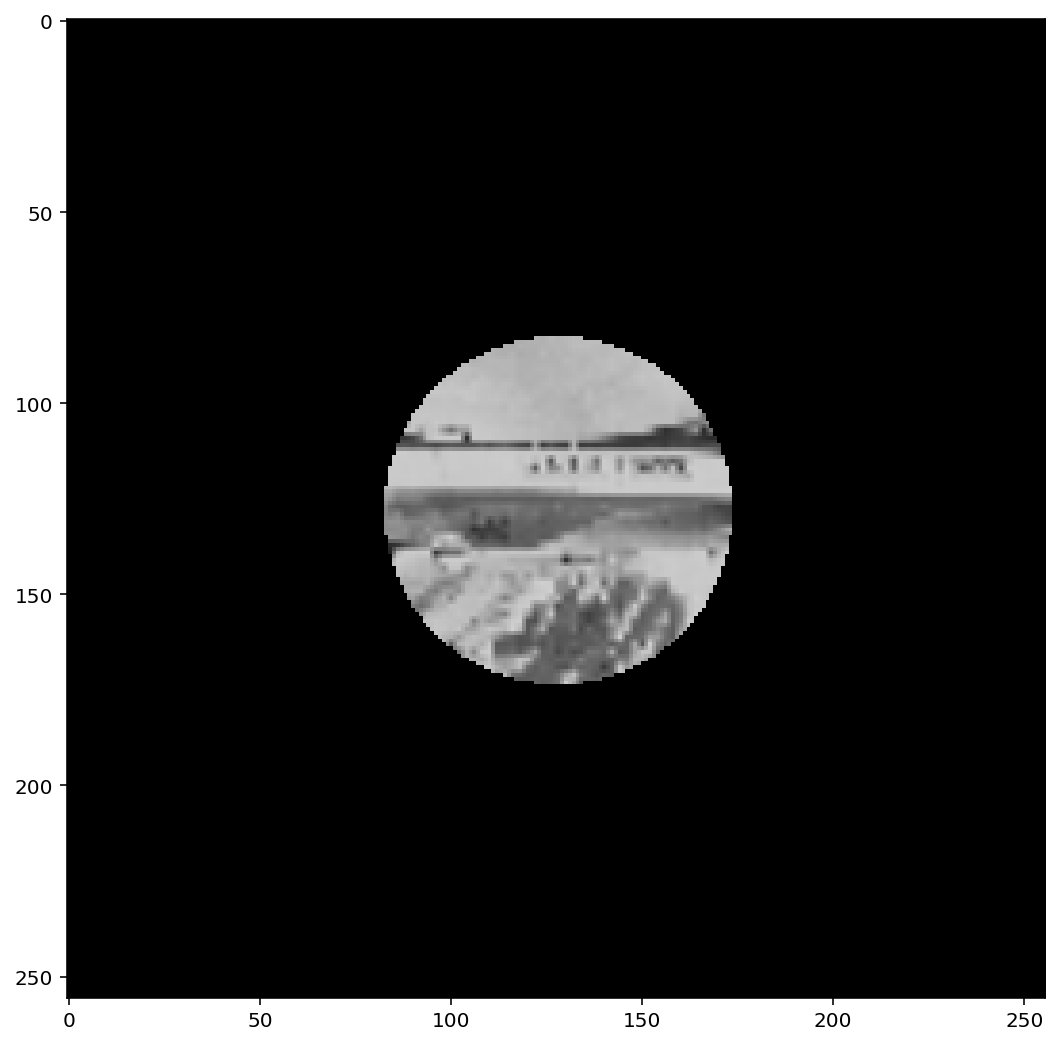

In [30]:
jet_masked = cv2.multiply(jet_img, circle.astype(np.bool).astype(np.uint8))

plt.imshow(jet_masked)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

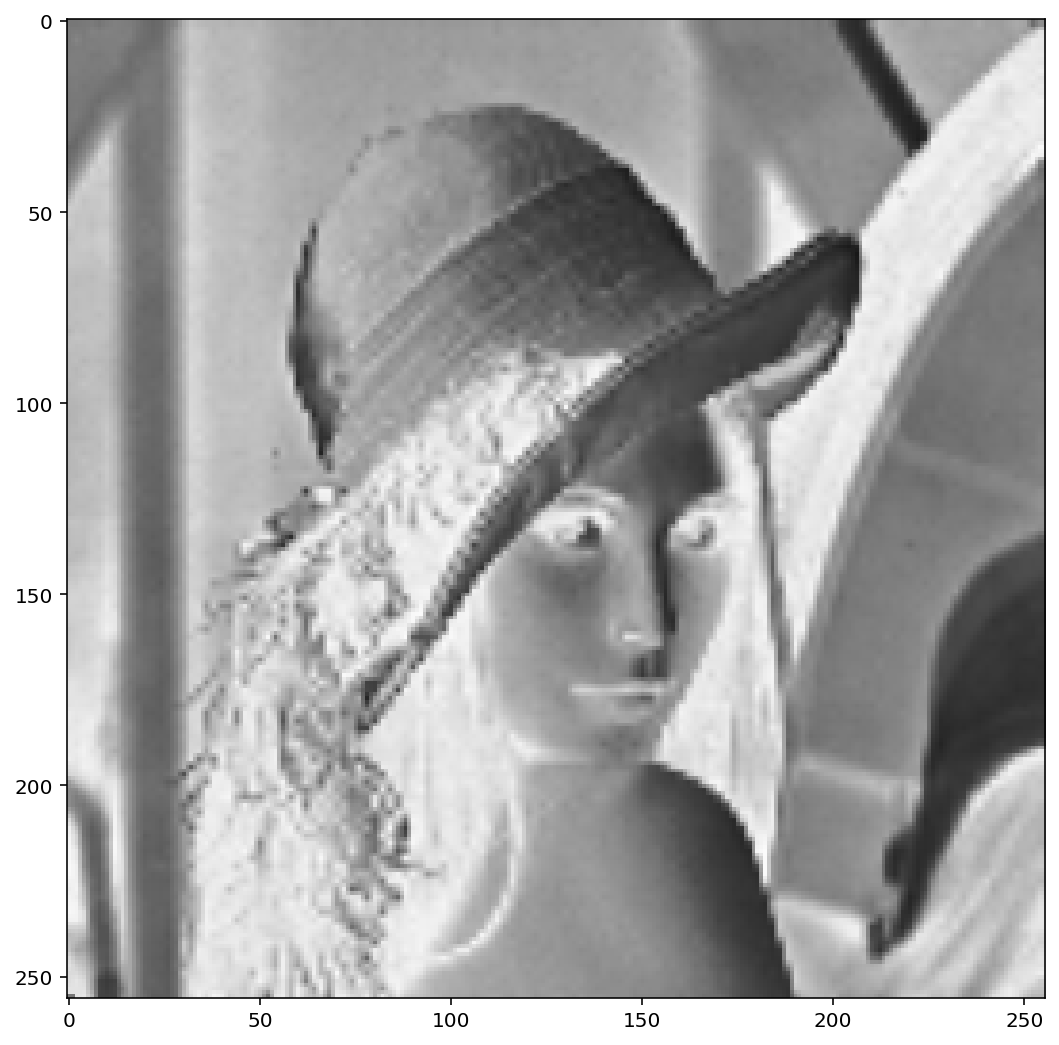

In [31]:
lena_negated = cv2.bitwise_not(lena_img)

plt.imshow(lena_negated)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [32]:
if not os.path.exists('kwadrat.bmp'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

In [33]:
square = cv2.imread('kwadrat.bmp')

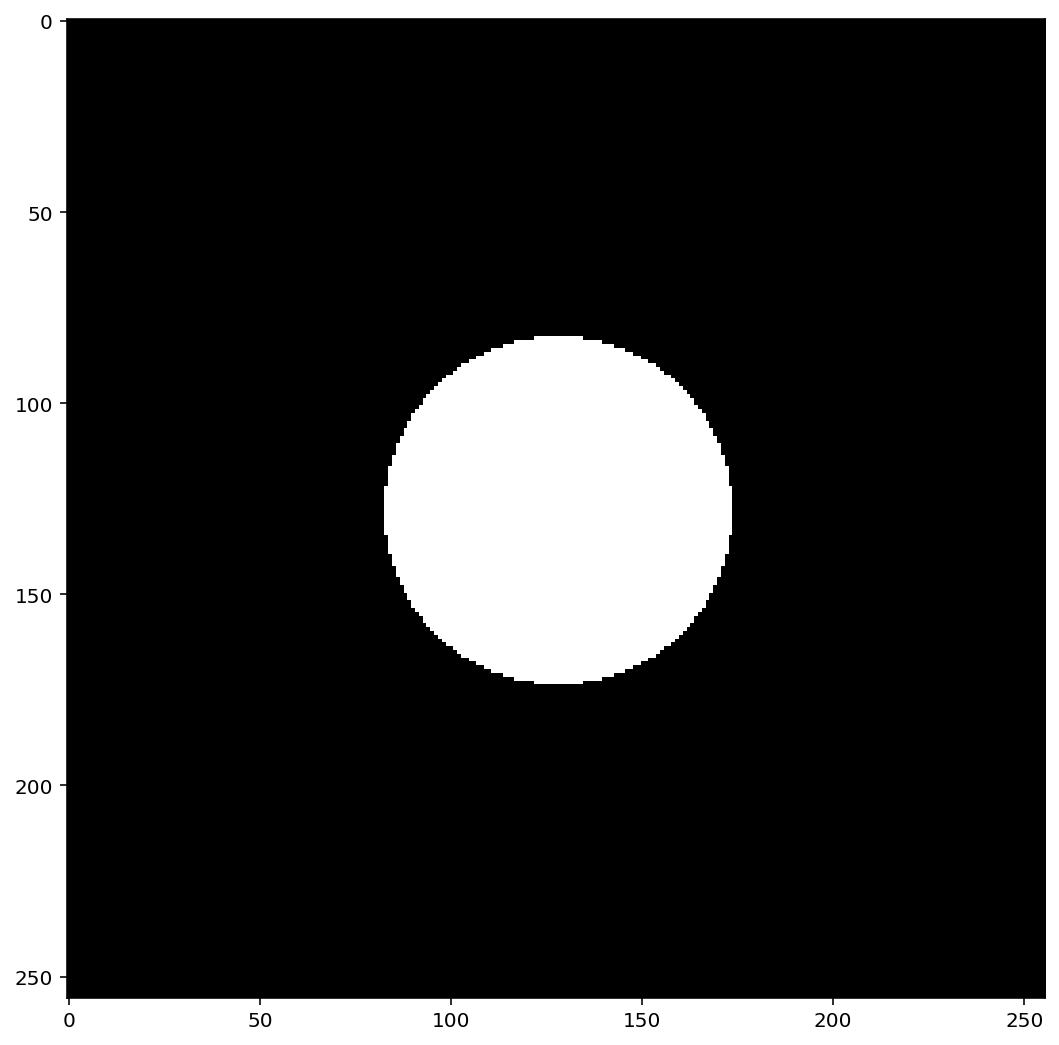

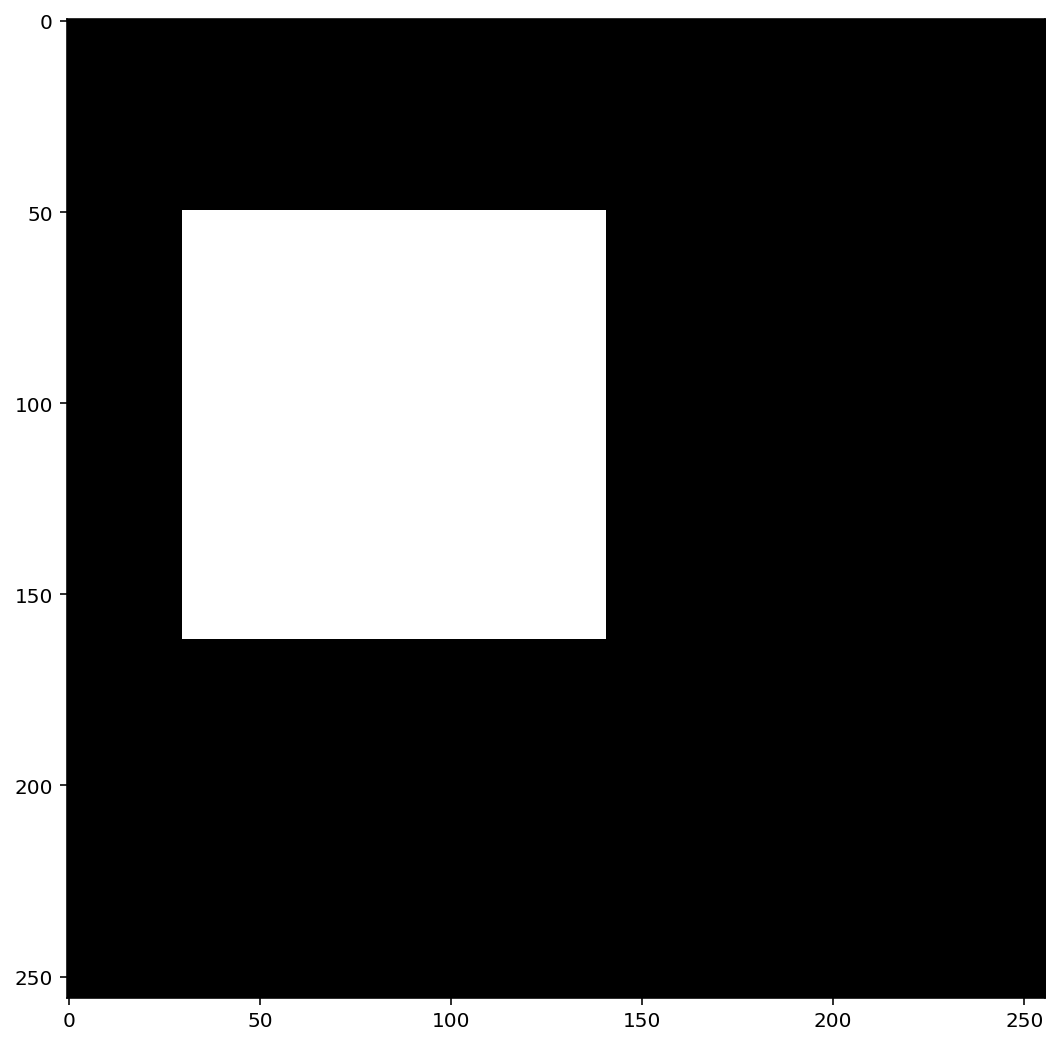

In [34]:
plt.imshow(circle)
plt.show()

plt.imshow(square)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

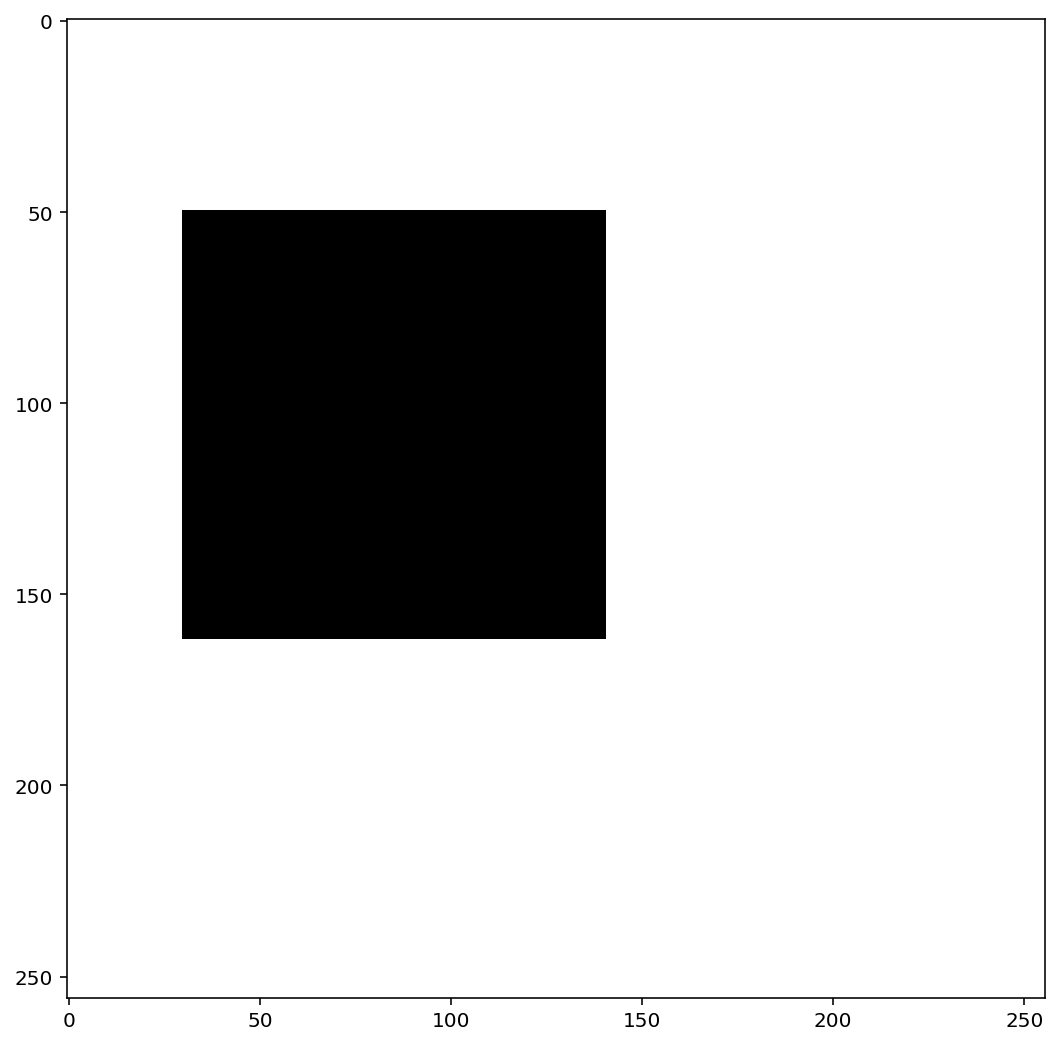

In [35]:
plt.imshow(~square)
plt.show()

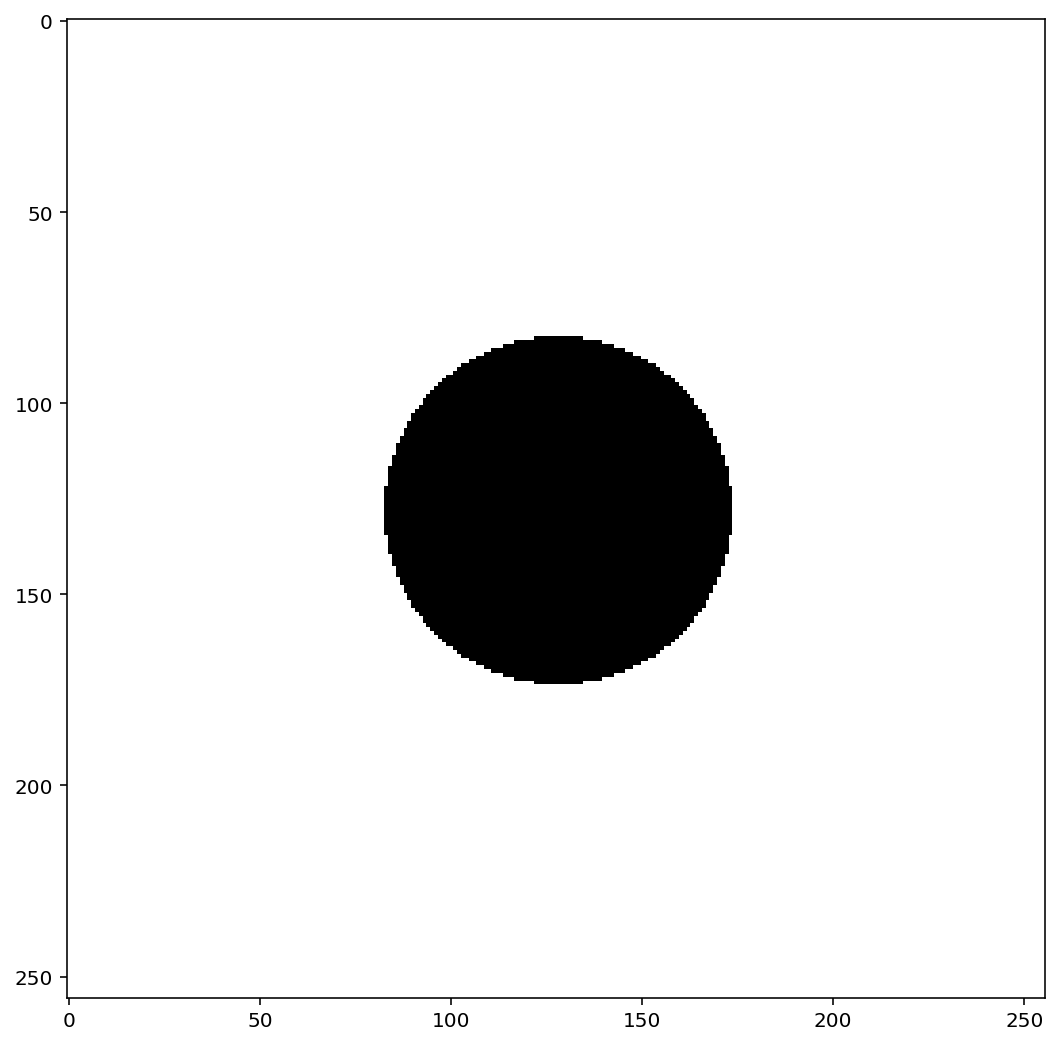

In [36]:
plt.imshow(~circle)
plt.show()

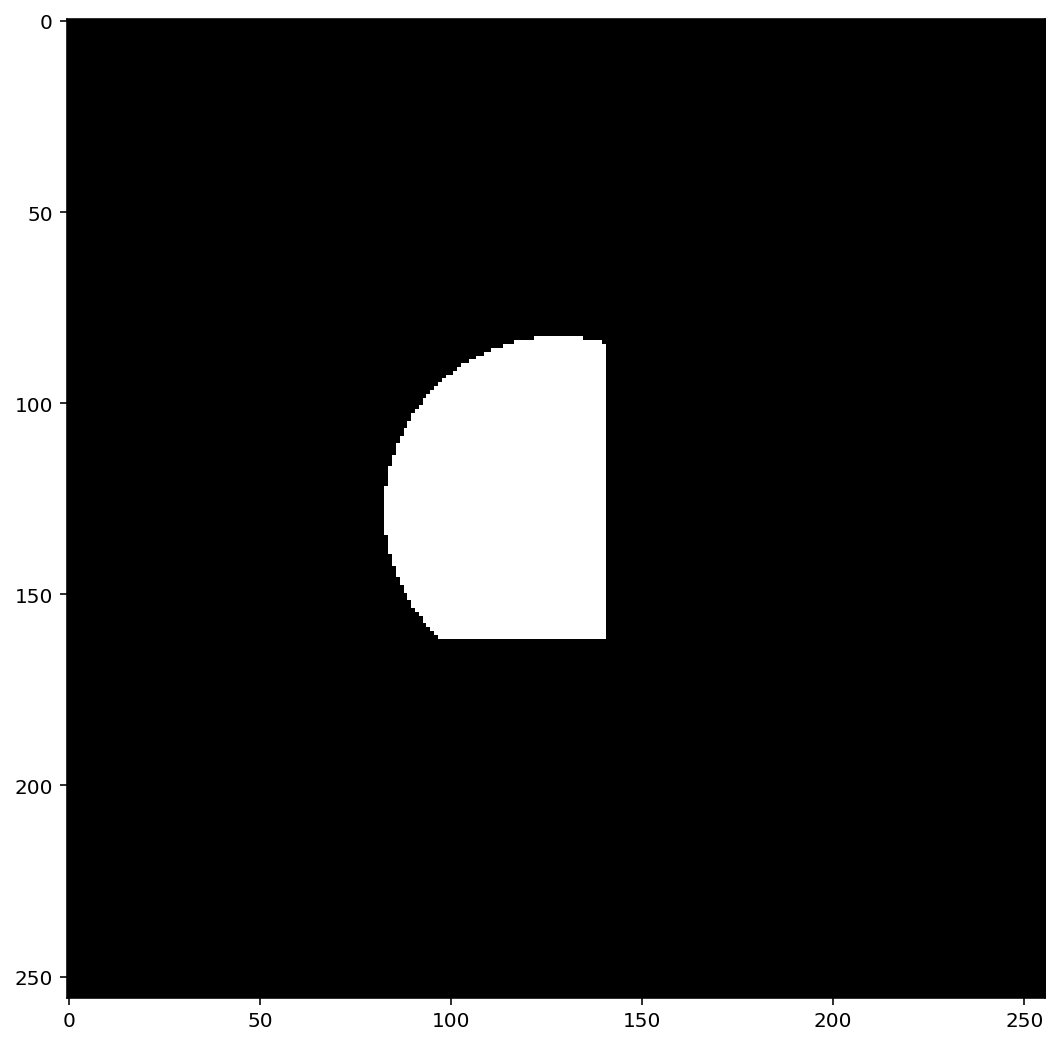

In [37]:
plt.imshow(square & circle)
plt.show()

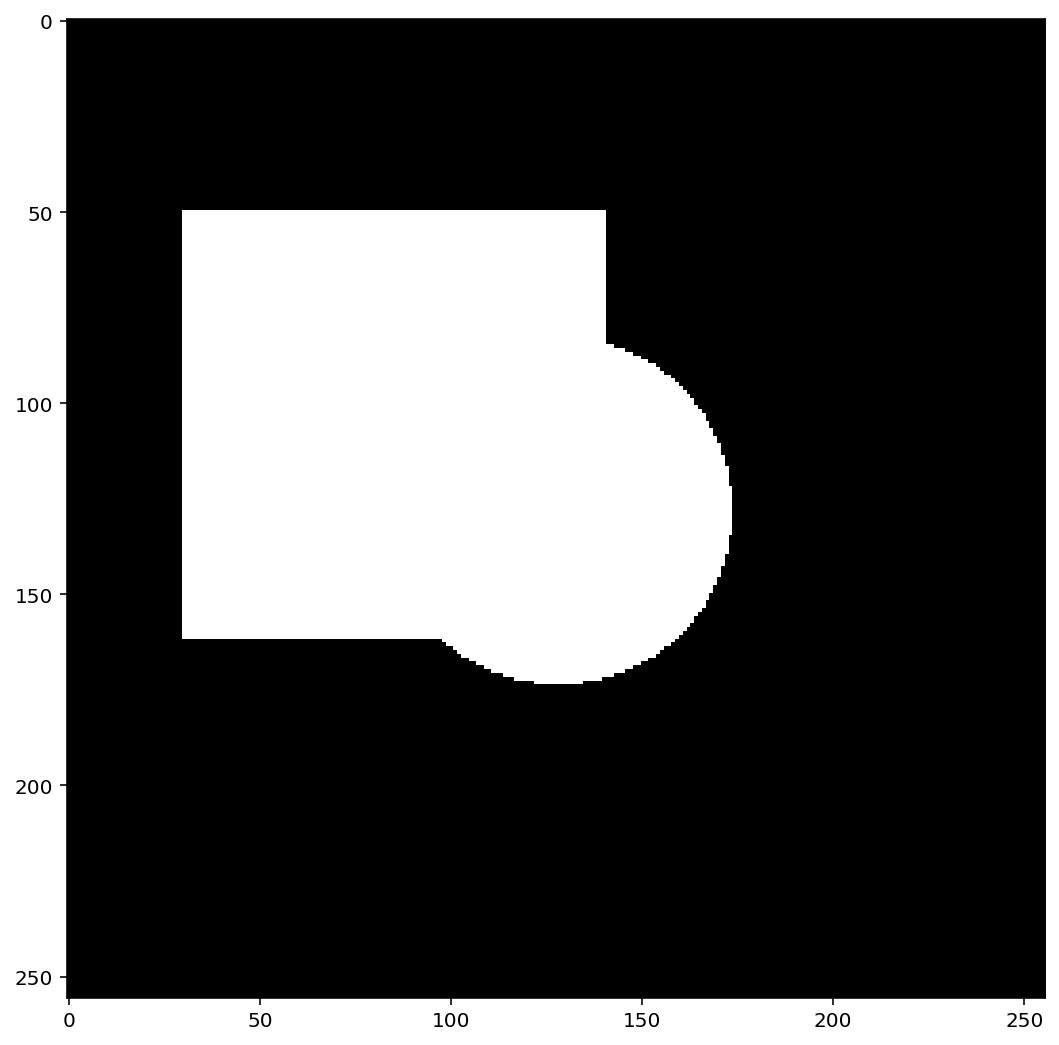

In [38]:
plt.imshow(square | circle)
plt.show()

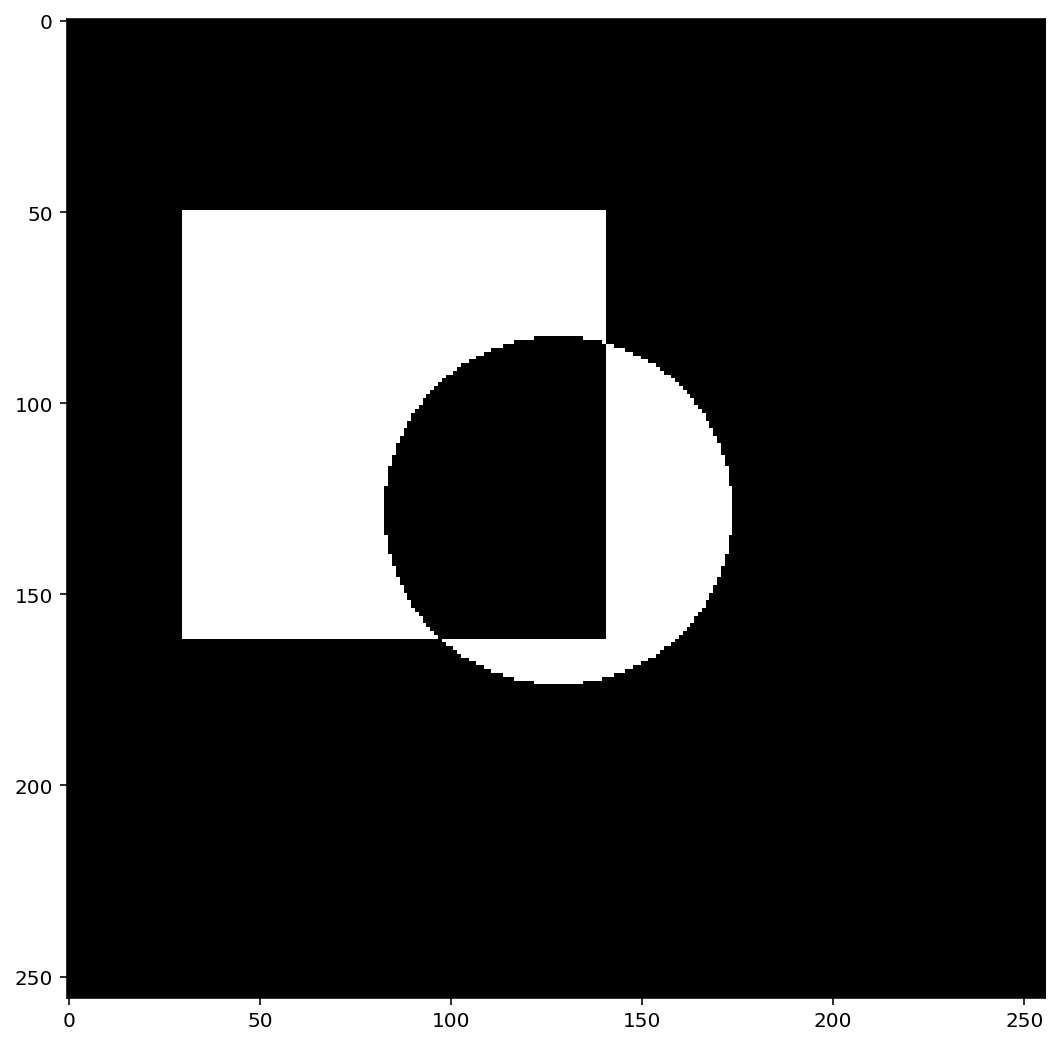

In [39]:
plt.imshow(square ^ circle)
plt.show()